Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data_AUG = pd.read_csv("apartments_pl_2023_08.csv")
data_SEP = pd.read_csv("apartments_pl_2023_09.csv")
data_OCT = pd.read_csv("apartments_pl_2023_10.csv")

# Analiza danych

Wyniki analizy danych (specyficzne dla konkretnego zbioru danych) standardowo powinny zawierać przynajmniej następujące elementy:
* liczba atrybutów i typy ich wartości
* liczba różnych wartości atrybutów, które nie są ciągłe (ze skończonego, niewielkiego zakresu)
* atrybut decyzyjny - charakterystyka
* brakujące wartości (z podziałem na obiekty i w ramach poszczególnych atrybutów warunkowych)
* duplikaty
* liczebności przykładów z poszczególnych klas
* współczynnik IR (imbalanced ratio)
* mapa korelacji atrybutów
* weryfikacja zasadności pozostawienia/usunięcia poszczególnych atrybutów na podstawie wiedzy dziedzinowej
* analiza (komentarze dodawane na bieżąco w notatniku)
* wnioski

In [3]:
print("data_AUG length: ", len(data_AUG))
print("data_SEP length: ", len(data_SEP))
print("data_OCT length: ", len(data_OCT))

data_AUG length:  18905
data_SEP length:  16997
data_OCT length:  16690


In [4]:
data_AUG.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.00,4.00,10.00,1980.00,53.38,14.63,...,0.41,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.00,8.00,10.00,NaN,53.44,14.56,...,0.20,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.00,2.00,3.00,NaN,53.45,14.55,...,0.28,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.00,2.00,3.00,NaN,53.44,14.53,...,0.09,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.00,1.00,3.00,NaN,53.41,14.50,...,0.51,condominium,NaN,NaN,no,no,no,no,no,759000


In [5]:
data_SEP.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.00,2.00,3.00,NaN,53.43,14.54,...,0.32,condominium,brick,NaN,no,yes,no,no,yes,799000
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.00,5.00,5.00,NaN,53.43,14.55,...,0.07,cooperative,NaN,NaN,no,no,yes,no,no,420000
2,3b8819c6c9ffd55adfddfd5bafcc844d,szczecin,tenement,50.00,2.00,NaN,1.00,NaN,53.36,14.66,...,0.40,condominium,brick,NaN,yes,no,no,no,no,350000
3,708ccd264180315a4cfe6324ed4861d0,szczecin,blockOfFlats,55.19,2.00,1.00,2.00,2013.00,53.48,14.54,...,0.18,condominium,brick,premium,yes,yes,no,yes,yes,607000
4,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.00,2.00,3.00,NaN,53.45,14.55,...,0.28,condominium,brick,NaN,no,no,no,no,no,565000


In [6]:
data_OCT.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.00,5.00,5.00,NaN,53.43,14.55,...,0.07,cooperative,NaN,NaN,no,no,yes,no,no,420000
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.00,2.00,3.00,NaN,53.45,14.55,...,0.28,condominium,brick,NaN,no,no,no,no,no,565000
2,ede1c0d953ff85f3cd9676d39ca8f62d,szczecin,blockOfFlats,37.00,2.00,8.00,10.00,1970.00,53.44,14.56,...,0.20,cooperative,concreteSlab,NaN,no,yes,yes,yes,yes,429995
3,6c807c6c86a74c57a3fd4445a1f49a46,szczecin,apartmentBuilding,48.00,2.00,4.00,6.00,NaN,53.44,14.57,...,0.18,condominium,brick,NaN,no,yes,no,no,no,550000
4,bb14c9a540275da73f6cb6ed42e5c26c,szczecin,apartmentBuilding,55.19,2.00,1.00,2.00,2013.00,53.48,14.54,...,0.04,condominium,brick,premium,yes,yes,no,yes,yes,607000


In [7]:
# dane z poszczególnych miesięcy z pominięciem unikalnych ID
data_AUG_noid = data_AUG.drop(columns=["id"])
data_SEP_noid = data_SEP.drop(columns=["id"])
data_OCT_noid = data_OCT.drop(columns=["id"])

In [8]:
# złączenie plików z danymi
data_ALL = pd.concat([data_AUG, data_SEP, data_OCT], ignore_index=True)
# wszystkie dane z pominięciem unikalnych ID
data_ALL_noid = data_ALL.drop(columns=["id"])

In [9]:
data_ALL.sample(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
24082,5322e5845150875a1d8e9eaba7ba2754,gdansk,blockOfFlats,83.81,4.00,3.00,10.00,2022.00,54.41,18.60,...,0.45,condominium,NaN,NaN,no,no,yes,no,no,1190000
47276,0cf9ff6a57b97b294f534f7968982eee,warszawa,blockOfFlats,59.45,2.00,5.00,10.00,1987.00,52.25,20.91,...,0.36,cooperative,NaN,low,no,no,yes,no,no,598000
32997,e0232f9373243c659327d782befaf097,warszawa,blockOfFlats,44.00,2.00,2.00,4.00,1936.00,52.26,20.98,...,0.08,condominium,NaN,NaN,no,no,no,no,yes,879000
34565,2a2b66b57ef5dd14f7b70b0170ad725e,warszawa,NaN,46.00,2.00,1.00,1.00,NaN,52.32,21.05,...,0.10,condominium,NaN,NaN,no,yes,no,no,no,520000
49139,49a211e80075aca155d977bfb668bece,warszawa,blockOfFlats,57.71,2.00,7.00,14.00,1963.00,52.24,21.05,...,0.04,condominium,NaN,NaN,no,yes,yes,no,no,1150000


## Liczba atrybutów i typy ich wartości

In [10]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52592 entries, 0 to 52591
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52592 non-null  object 
 1   city                  52592 non-null  object 
 2   type                  40942 non-null  object 
 3   squareMeters          52592 non-null  float64
 4   rooms                 52592 non-null  float64
 5   floor                 43065 non-null  float64
 6   floorCount            51842 non-null  float64
 7   buildYear             43467 non-null  float64
 8   latitude              52592 non-null  float64
 9   longitude             52592 non-null  float64
 10  centreDistance        52592 non-null  float64
 11  poiCount              52592 non-null  float64
 12  schoolDistance        52542 non-null  float64
 13  clinicDistance        52340 non-null  float64
 14  postOfficeDistance    52519 non-null  float64
 15  kindergartenDistanc

### Sierpień

In [11]:
pd.set_option('display.precision', 2)

In [12]:
data_AUG.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,18905.00,18905.00,15467.00,18643.00,15634.00,18905.00,18905.00,18905.00,18905.00,18891.00,18817.00,18880.00,18892.00,18847.00,18340.00,18878.00,18905.00
mean,58.51,2.68,3.34,5.28,1984.55,52.02,19.52,4.40,20.10,0.41,1.00,0.52,0.37,0.36,1.46,0.36,692559.22
std,21.06,0.90,2.55,3.33,33.77,1.35,1.77,2.86,23.51,0.47,0.91,0.51,0.45,0.48,1.10,0.47,344389.01
min,25.00,1.00,1.00,1.00,1850.00,49.98,14.45,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,150000.00
25%,44.20,2.00,2.00,3.00,1967.00,51.11,18.54,2.07,7.00,0.17,0.37,0.24,0.16,0.12,0.59,0.14,458800.00
50%,54.40,3.00,3.00,4.00,1990.00,52.19,19.91,4.01,13.00,0.29,0.70,0.39,0.26,0.23,1.14,0.24,620000.00
75%,68.20,3.00,4.00,6.00,2014.00,52.41,20.99,6.18,23.00,0.47,1.29,0.62,0.41,0.42,2.11,0.41,830000.00
max,150.00,6.00,29.00,29.00,2023.00,54.58,23.21,16.94,208.00,4.82,5.00,4.97,4.96,4.99,5.00,4.99,2500000.00


### Wrzesień

In [13]:
data_SEP.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,16997.00,16997.00,13954.00,16751.00,14048.00,16997.00,16997.00,16997.00,16997.00,16982.00,16918.00,16974.00,16983.00,16954.00,16495.00,16974.00,16997.00
mean,59.03,2.69,3.33,5.24,1984.35,52.07,19.53,4.35,20.35,0.42,0.99,0.52,0.38,0.36,1.45,0.37,708097.22
std,21.36,0.92,2.53,3.31,34.04,1.33,1.79,2.89,23.71,0.48,0.91,0.52,0.47,0.49,1.11,0.48,351988.80
min,25.00,1.00,1.00,1.00,1851.00,49.98,14.45,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,154900.00
25%,44.50,2.00,2.00,3.00,1965.00,51.12,18.53,1.96,6.00,0.17,0.36,0.24,0.16,0.12,0.58,0.15,465000.00
50%,55.19,3.00,3.00,4.00,1991.00,52.20,19.90,3.93,13.00,0.29,0.68,0.39,0.27,0.23,1.12,0.24,639000.00
75%,69.00,3.00,4.00,6.00,2014.00,52.45,21.00,6.15,24.00,0.47,1.27,0.63,0.42,0.42,2.08,0.41,850000.00
max,150.00,6.00,29.00,29.00,2023.00,54.61,23.21,16.92,208.00,4.82,4.99,4.91,4.96,4.99,5.00,4.86,2500000.00


### Październik

In [14]:
data_OCT.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,16690.00,16690.00,13644.00,16448.00,13785.00,16690.00,16690.00,16690.00,16690.00,16669.00,16605.00,16665.00,16668.00,16637.00,16185.00,16661.00,16690.00
mean,58.99,2.68,3.27,5.16,1984.57,52.05,19.49,4.33,20.46,0.42,0.98,0.53,0.38,0.36,1.44,0.37,723546.18
std,21.35,0.91,2.46,3.20,34.16,1.33,1.78,2.88,24.10,0.48,0.91,0.52,0.46,0.48,1.11,0.48,352154.45
min,25.00,1.00,1.00,1.00,1851.00,49.98,14.45,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,152620.00
25%,44.40,2.00,2.00,3.00,1965.00,51.11,18.51,1.97,7.00,0.17,0.35,0.24,0.16,0.12,0.59,0.14,480000.00
50%,55.00,3.00,3.00,4.00,1992.00,52.20,19.89,3.92,13.00,0.29,0.67,0.40,0.27,0.23,1.12,0.24,659000.00
75%,69.00,3.00,4.00,6.00,2015.00,52.44,20.99,6.09,24.00,0.47,1.25,0.63,0.42,0.42,2.05,0.41,870000.00
max,150.00,6.00,29.00,29.00,2023.00,54.61,23.20,16.92,208.00,4.82,4.99,4.91,4.96,4.99,5.00,4.86,2500000.00


### Dane złączone

In [15]:
data_ALL.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,52592.00,52592.00,43065.00,51842.00,43467.00,52592.00,52592.00,52592.00,52592.00,52542.00,52340.00,52519.00,52543.00,52438.00,51020.00,52513.00,52592.00
mean,58.83,2.68,3.31,5.23,1984.49,52.04,19.51,4.36,20.29,0.42,0.99,0.52,0.38,0.36,1.45,0.37,707414.56
std,21.25,0.91,2.51,3.28,33.98,1.34,1.78,2.88,23.77,0.48,0.91,0.51,0.46,0.48,1.11,0.48,349554.20
min,25.00,1.00,1.00,1.00,1850.00,49.98,14.45,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,150000.00
25%,44.36,2.00,2.00,3.00,1965.00,51.11,18.53,2.01,7.00,0.17,0.36,0.24,0.16,0.12,0.59,0.14,468000.00
50%,55.00,3.00,3.00,4.00,1991.00,52.20,19.90,3.96,13.00,0.29,0.69,0.39,0.27,0.23,1.12,0.24,639000.00
75%,69.00,3.00,4.00,6.00,2014.00,52.44,20.99,6.14,24.00,0.47,1.27,0.63,0.42,0.42,2.08,0.41,850000.00
max,150.00,6.00,29.00,29.00,2023.00,54.61,23.21,16.94,208.00,4.82,5.00,4.97,4.96,4.99,5.00,4.99,2500000.00


## Liczba różnych wartości atrybutów, które nie są ciągłe (ze skończonego, niewielkiego zakresu)

In [16]:
def get_unique_count(data_frame):
    temp = []
    for column in data_frame.columns.values:
        temp.append([column, len(data_frame[column].unique())])
        
    unique = pd.DataFrame(np.array(temp), columns=["attribute", "unique"])
    return unique

### Liczba Unikalnych wartości dla poszczególnych kolumn - wszystkie dane

In [17]:
unique_value_counts = get_unique_count(data_ALL)
unique_value_counts

,attribute,unique
0,id,32027
1,city,15
2,type,4
3,squareMeters,5175
4,rooms,6
5,floor,25
6,floorCount,30
7,buildYear,158
8,latitude,20723
9,longitude,21215


<p>Na podstawie analizy opisów kolumn przyjęto, że wszystkie atrybuty o liczbie unikalnych wartości powyżej 200 (współrzędne geograficzne, odległosci od różnych punktów zainteresowań) zawierają dane ciągłe. Wyjątkiem jest kolumna ID, która zawiera dane dyskretne, ale kolumna ta nie będzie wykorzystywana do budowy modelu.</p>

In [18]:
unique_descrete_value_counts = unique_value_counts[unique_value_counts["unique"].astype('int64') < 200]
unique_descrete_value_counts

,attribute,unique
1,city,15
2,type,4
4,rooms,6
5,floor,25
6,floorCount,30
7,buildYear,158
11,poiCount,170
19,ownership,3
20,buildingMaterial,3
21,condition,3


In [19]:
data_ALL[unique_descrete_value_counts['attribute']]

,city,type,rooms,floor,floorCount,buildYear,poiCount,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,szczecin,blockOfFlats,3.00,4.00,10.00,1980.00,9.00,condominium,concreteSlab,NaN,yes,yes,yes,no,yes
1,szczecin,blockOfFlats,2.00,8.00,10.00,NaN,16.00,cooperative,concreteSlab,NaN,no,yes,yes,no,yes
2,szczecin,tenement,3.00,2.00,3.00,NaN,9.00,condominium,brick,NaN,no,no,no,no,no
3,szczecin,tenement,3.00,2.00,3.00,NaN,32.00,condominium,brick,NaN,yes,yes,no,no,yes
4,szczecin,blockOfFlats,3.00,1.00,3.00,NaN,1.00,condominium,NaN,NaN,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52587,bydgoszcz,NaN,2.00,1.00,1.00,NaN,42.00,condominium,brick,NaN,yes,no,no,no,no
52588,bydgoszcz,tenement,4.00,3.00,4.00,1910.00,54.00,condominium,brick,premium,yes,yes,no,no,yes
52589,bydgoszcz,tenement,2.00,1.00,1.00,1910.00,54.00,condominium,brick,NaN,yes,no,no,no,yes
52590,bydgoszcz,NaN,5.00,1.00,4.00,2019.00,9.00,condominium,NaN,NaN,no,yes,yes,no,no


## Atrybut decyzyjny - charakterystyka

In [20]:
price_AUG = data_AUG["price"].rename("price_AUG")
price_SEP = data_SEP["price"].rename("price_SEP")
price_OCT = data_OCT["price"].rename("price_OCT")
price_ALL = data_ALL["price"].rename("price_ALL")

In [21]:
# porównanie statystyk cen z poszczególnych miesięcy
pd.concat([
        price_AUG.describe().map(int), 
        price_SEP.describe().map(int), 
        price_OCT.describe().map(int),
        price_ALL.describe().map(int)
    ],
    axis=1
)

,price_AUG,price_SEP,price_OCT,price_ALL
count,18905,16997,16690,52592
mean,692559,708097,723546,707414
std,344389,351988,352154,349554
min,150000,154900,152620,150000
25%,458800,465000,480000,468000
50%,620000,639000,659000,639000
75%,830000,850000,870000,850000
max,2500000,2500000,2500000,2500000


Wszystkie parametry cen, poza liczbą dostępnych na sprzedaż mieszkań, wykazują trend rosnący, co może wskazywać na ogólny wzrost cen mieszkań. Prawdopodobnymi przyczynami może być

In [22]:
price_ALL.value_counts()

599000     790
699000     718
799000     575
499000     574
650000     542
          ... 
799990       1
1083269      1
547200       1
829800       1
239900       1
Name: price_ALL, Length: 3859, dtype: int64

In [23]:
len(price_ALL.unique())

3859

<Axes: title={'center': 'Price'}, xlabel='PLN', ylabel='Count'>

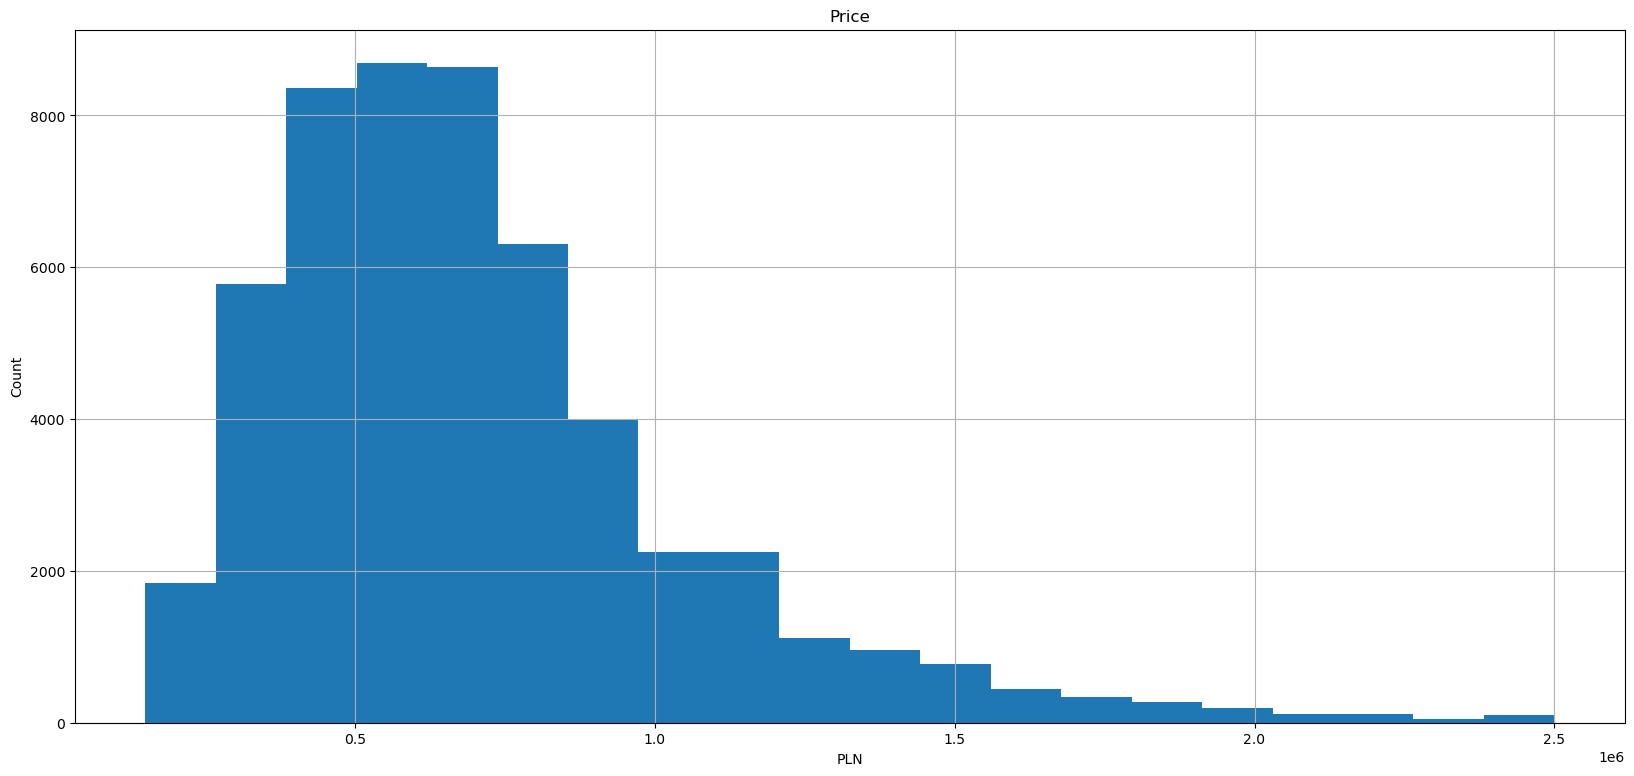

In [24]:
price_hist = price_ALL.hist(bins=20, figsize=(20,9))
price_hist.set_title("Price")
price_hist.set_xlabel("PLN")
price_hist.set_ylabel("Count")
price_hist.locator_params(integer=True)
price_hist

W połączonych zbiorach danych występuje 3859 różnych wartości zmiennej klasyfikującej. Najczęsciej występującą wartością jest 599000.

## Brakujące wartości (z podziałem na obiekty i w ramach poszczególnych atrybutów warunkowych)

### Ilość brakujących danych w kolumnach

In [25]:
missing_values = pd.concat([
        data_AUG.isna().sum(),
        data_AUG.isna().sum() / len(data_AUG) * 100,
        data_SEP.isna().sum(),
        data_SEP.isna().sum() / len(data_SEP) * 100,
        data_OCT.isna().sum(),
        data_OCT.isna().sum() / len(data_OCT) * 100,
        data_ALL.isna().sum(),
        data_ALL.isna().sum() / len(data_ALL) * 100
    ],
    axis=1
)
missing_values.rename(columns = {0:'AUG', 1:'AUG %',2:'SEP', 3:'SEP %',4:'OCT', 5:'OCT %',6:'ALL', 7:'ALL %'}, inplace = True)
missing_values

,AUG,AUG %,SEP,SEP %,OCT,OCT %,ALL,ALL %
id,0,0.00,0,0.00,0,0.00,0,0.00
city,0,0.00,0,0.00,0,0.00,0,0.00
type,4039,21.36,3826,22.51,3785,22.68,11650,22.15
squareMeters,0,0.00,0,0.00,0,0.00,0,0.00
rooms,0,0.00,0,0.00,0,0.00,0,0.00
floor,3438,18.19,3043,17.90,3046,18.25,9527,18.11
floorCount,262,1.39,246,1.45,242,1.45,750,1.43
buildYear,3271,17.30,2949,17.35,2905,17.41,9125,17.35
latitude,0,0.00,0,0.00,0,0.00,0,0.00
longitude,0,0.00,0,0.00,0,0.00,0,0.00


### Liczba wierszy z brakującymi danymi w przynajmniej 1 kolumnie

In [26]:
pd.DataFrame({
    'AUG': data_AUG.isna().any(axis=1).sum(),
    'SEP': data_SEP.isna().any(axis=1).sum(),
    'OCT': data_OCT.isna().any(axis=1).sum(),
    'ALL': data_ALL.isna().any(axis=1).sum(),
}, index=["n/a #"])

,AUG,SEP,OCT,ALL
n/a #,16760,15079,14731,46570


## Wykresy wybranych atrybutów

### Ilość ogłoszeń z danego miasta

<Axes: title={'center': 'Offers in each city'}, xlabel='Name', ylabel='Count'>

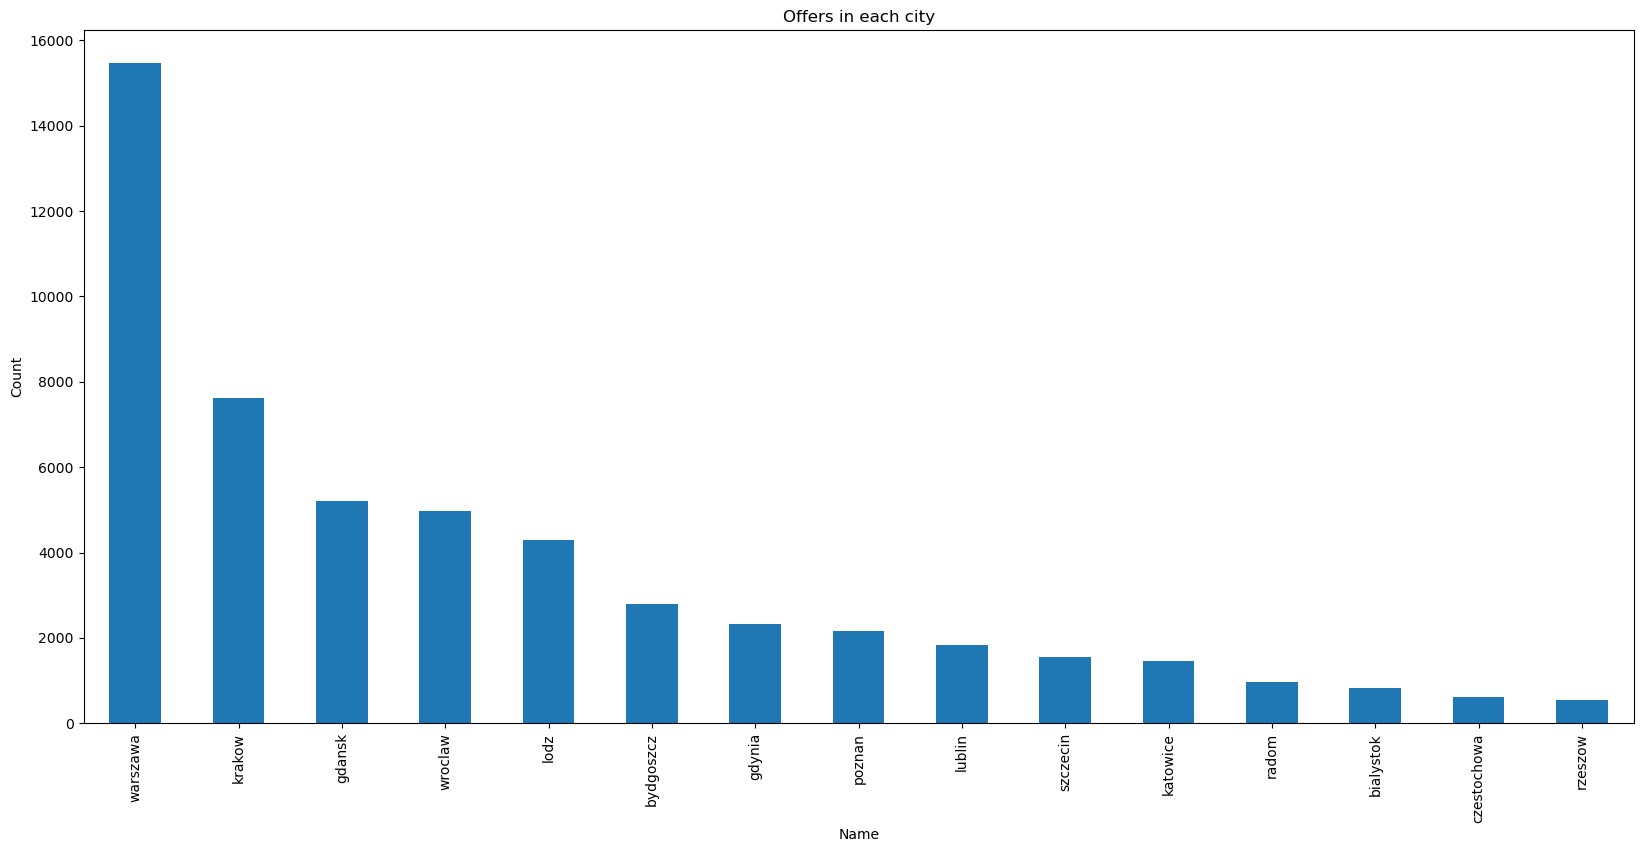

In [27]:
city_count = pd.value_counts(data_ALL['city']).plot.bar(figsize=(20,9))
city_count.set_title("Offers in each city")
city_count.set_xlabel("Name")
city_count.set_ylabel("Count")
city_count

Najwięcej ogłoszeń pojawia się z Warszawy, Krakowa oraz Gdańska.

### Ilość ogłoszeń z danym typem budynku 

<Axes: title={'center': 'Offers with each type'}, xlabel='Type', ylabel='Count'>

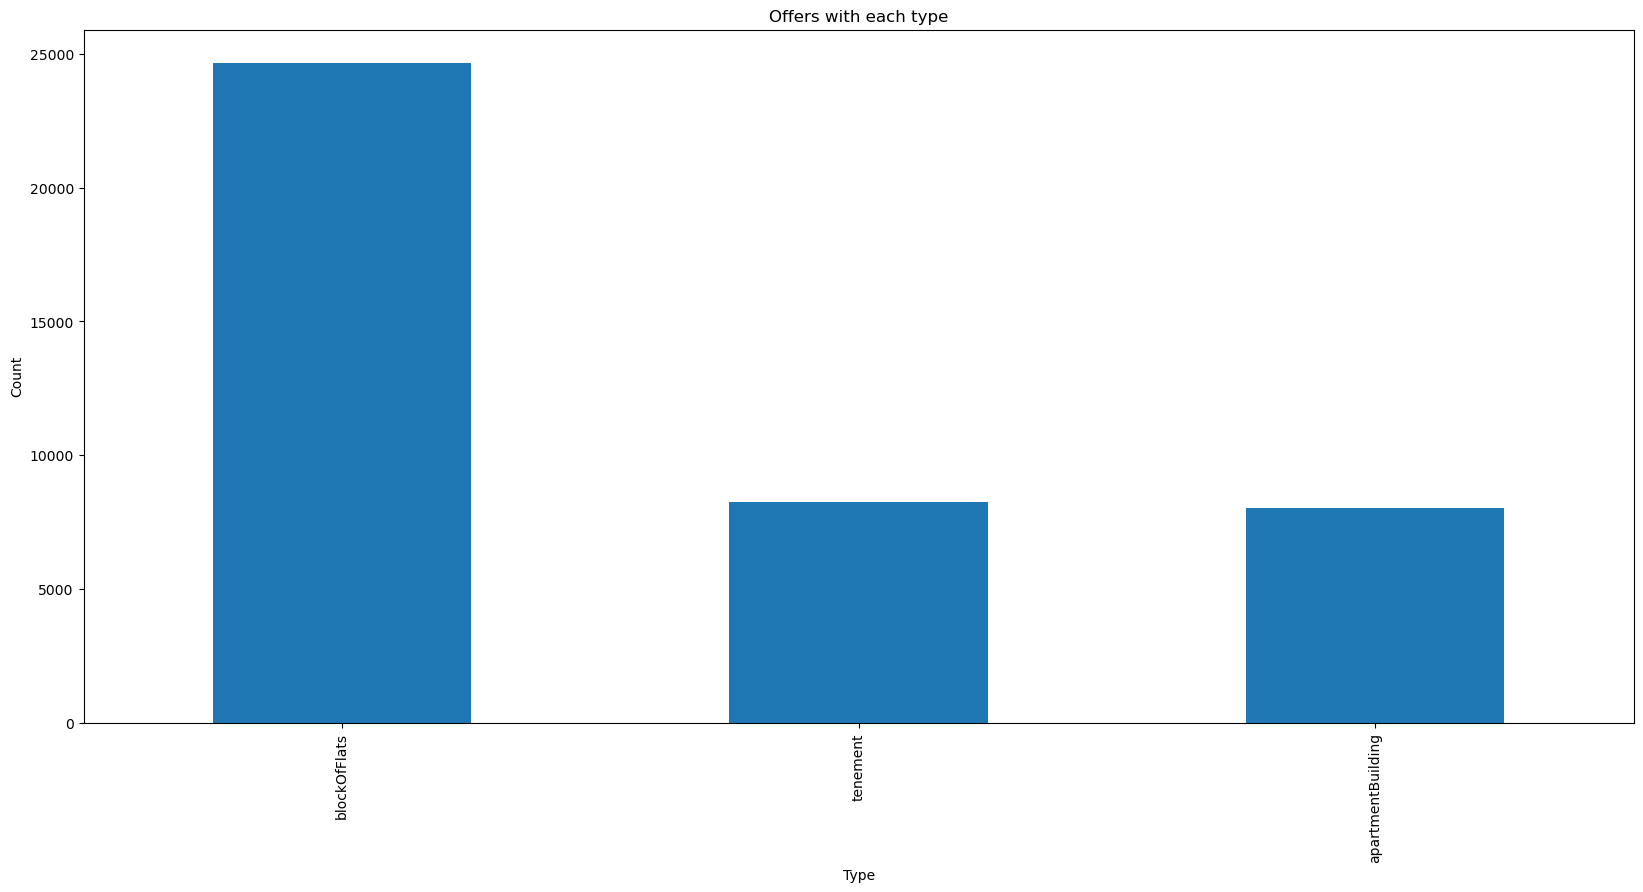

In [28]:
type_count = pd.value_counts(data_ALL['type']).plot.bar(figsize=(20,9))
type_count.set_title("Offers with each type")
type_count.set_xlabel("Type")
type_count.set_ylabel("Count")
type_count

Zgodnie z oczekiwaniami, najwięcej ogłoszeń dotyczy mieszkań w blokach.

### Ilość pokoi w mieszkaniach

<Axes: title={'center': 'Offers with number of rooms'}, xlabel='Rooms', ylabel='Count'>

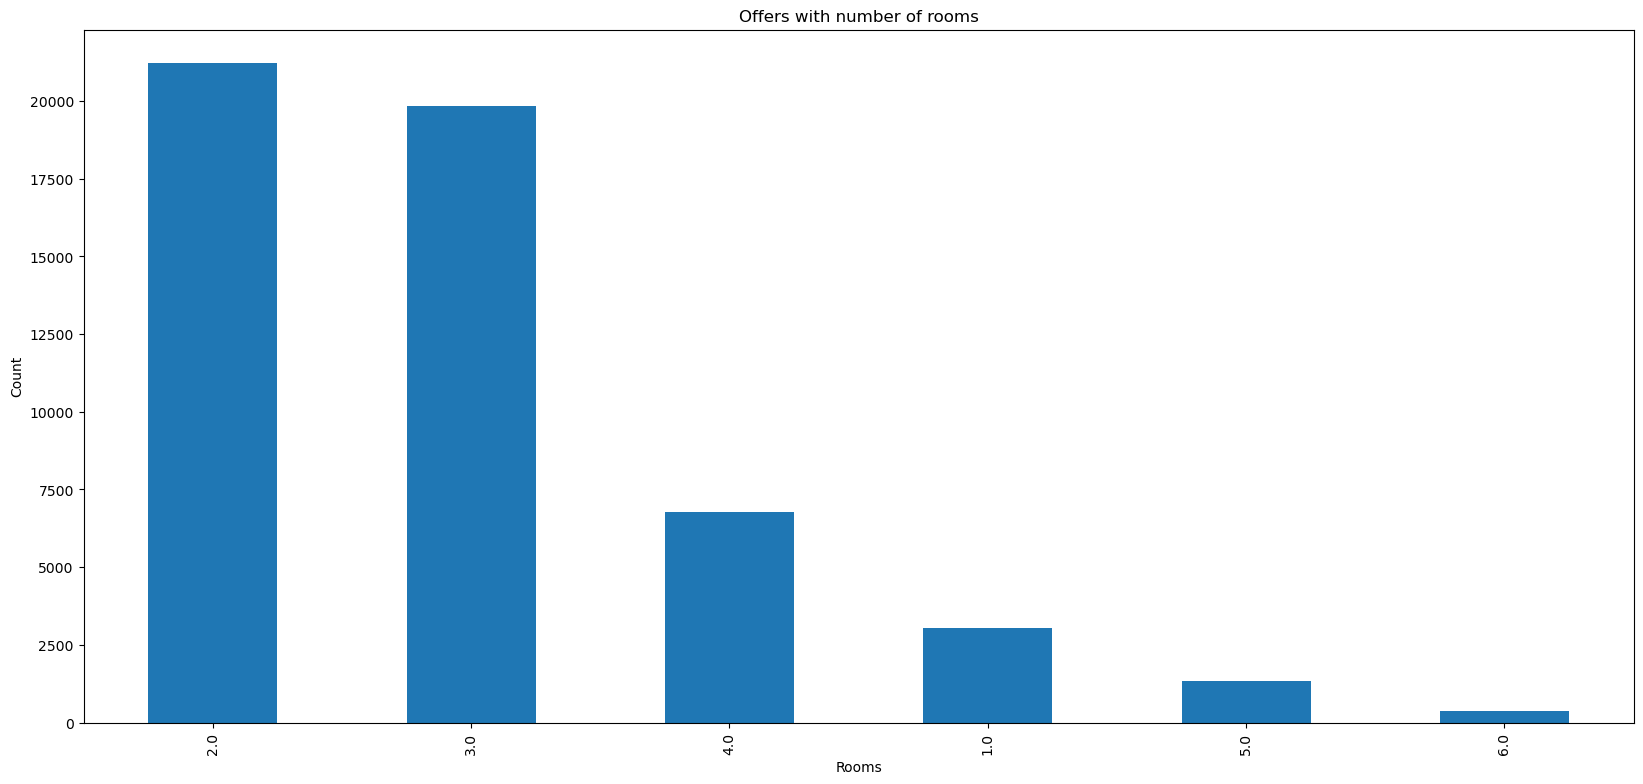

In [29]:
rooms_count = pd.value_counts(data_ALL['rooms']).plot.bar(figsize=(20,9))
rooms_count.set_title("Offers with number of rooms")
rooms_count.set_xlabel("Rooms")
rooms_count.set_ylabel("Count")
rooms_count

Najwięcej mieszkań posiada 2 lub 3 pokoje.

### Ilość mieszkań na danym piętrze

<Axes: title={'center': 'Offers on each floor'}, xlabel='Floor', ylabel='Count'>

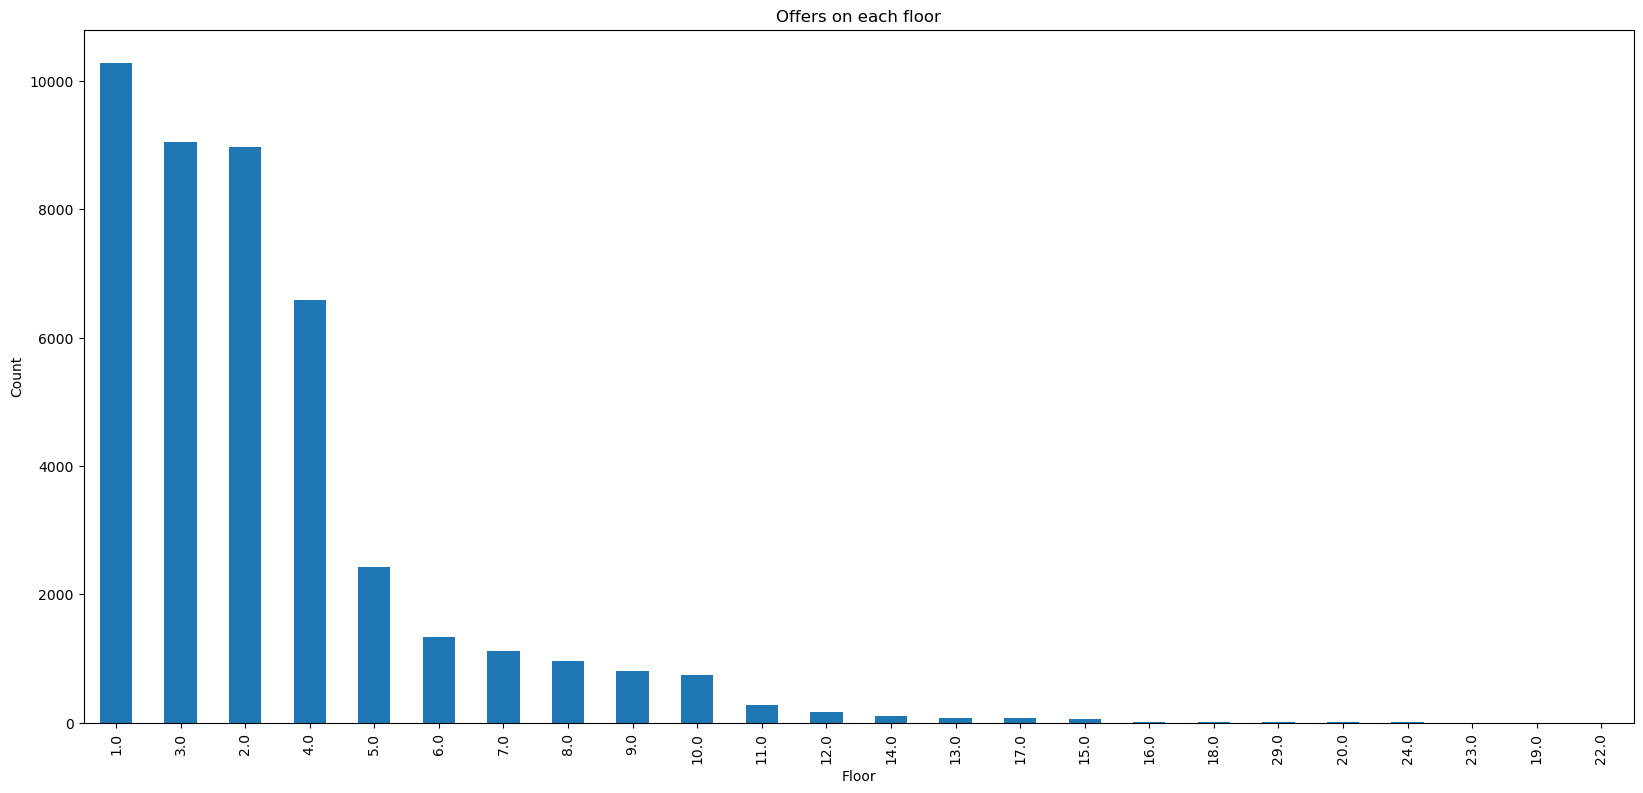

In [30]:
floor_count = pd.value_counts(data_ALL['floor']).plot.bar(figsize=(20,9))
floor_count.set_title("Offers on each floor")
floor_count.set_xlabel("Floor")
floor_count.set_ylabel("Count")
floor_count

### Histogram roku budowy mieszkań

<Axes: title={'center': 'BuildYear histogram'}, xlabel='buildYear', ylabel='Count'>

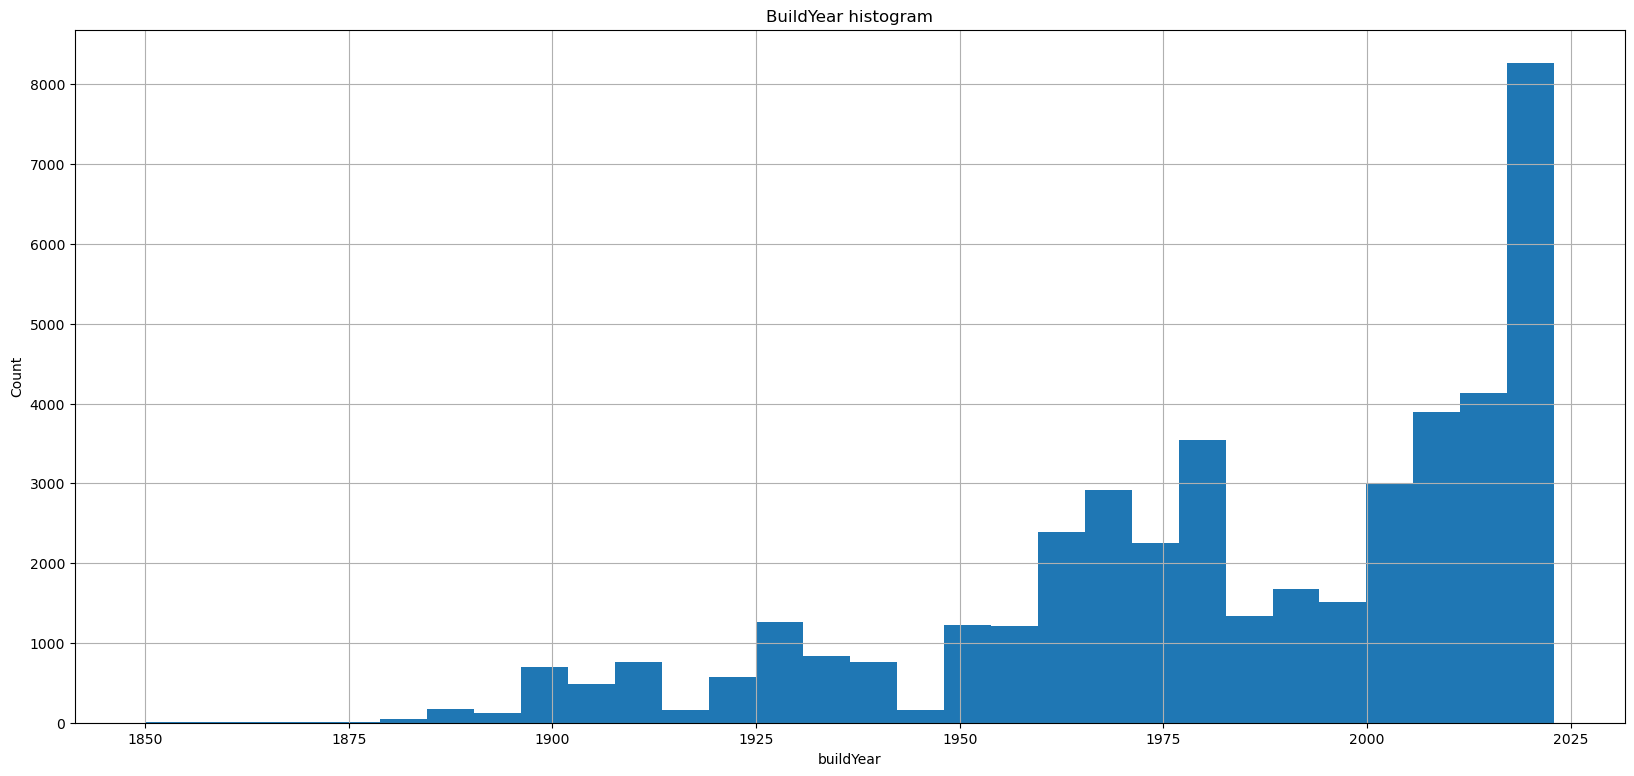

In [31]:
buildYear_hist = data_ALL['buildYear'].hist(bins=30,figsize=(20,9))
buildYear_hist.set_title("BuildYear histogram")
buildYear_hist.set_xlabel("buildYear")
buildYear_hist.set_ylabel("Count")
buildYear_hist

Dość znacząca część mieszkań w ogłoszeniach została wybudowana po 2000 roku. 

### Histogram liczby punktów zainteresowań w okolicy mieszkań

<Axes: title={'center': 'PoiCount histogram'}, xlabel='poiCount', ylabel='Count'>

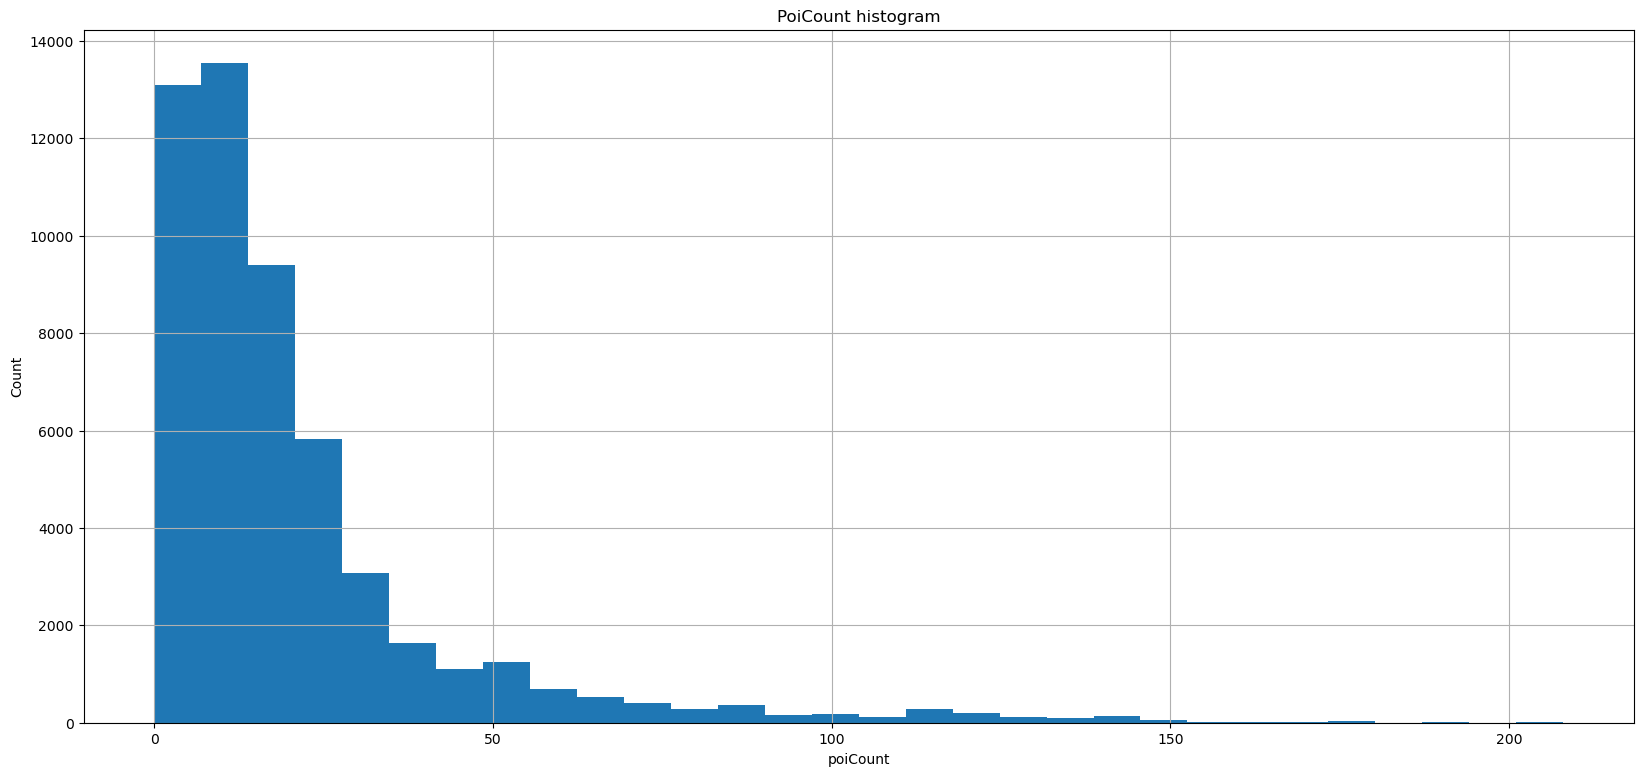

In [32]:
poiCount_hist = data_ALL['poiCount'].hist(bins=30,figsize=(20,9))
poiCount_hist.set_title("PoiCount histogram")
poiCount_hist.set_xlabel("poiCount")
poiCount_hist.set_ylabel("Count")
poiCount_hist

Najczęściej w okolicy mieszkań znajduje się około 15 punktów zainteresowań.

### Ilość rodzajów własności mieszkań

<Axes: title={'center': 'Ownership of apartments'}, xlabel='Ownership', ylabel='Count'>

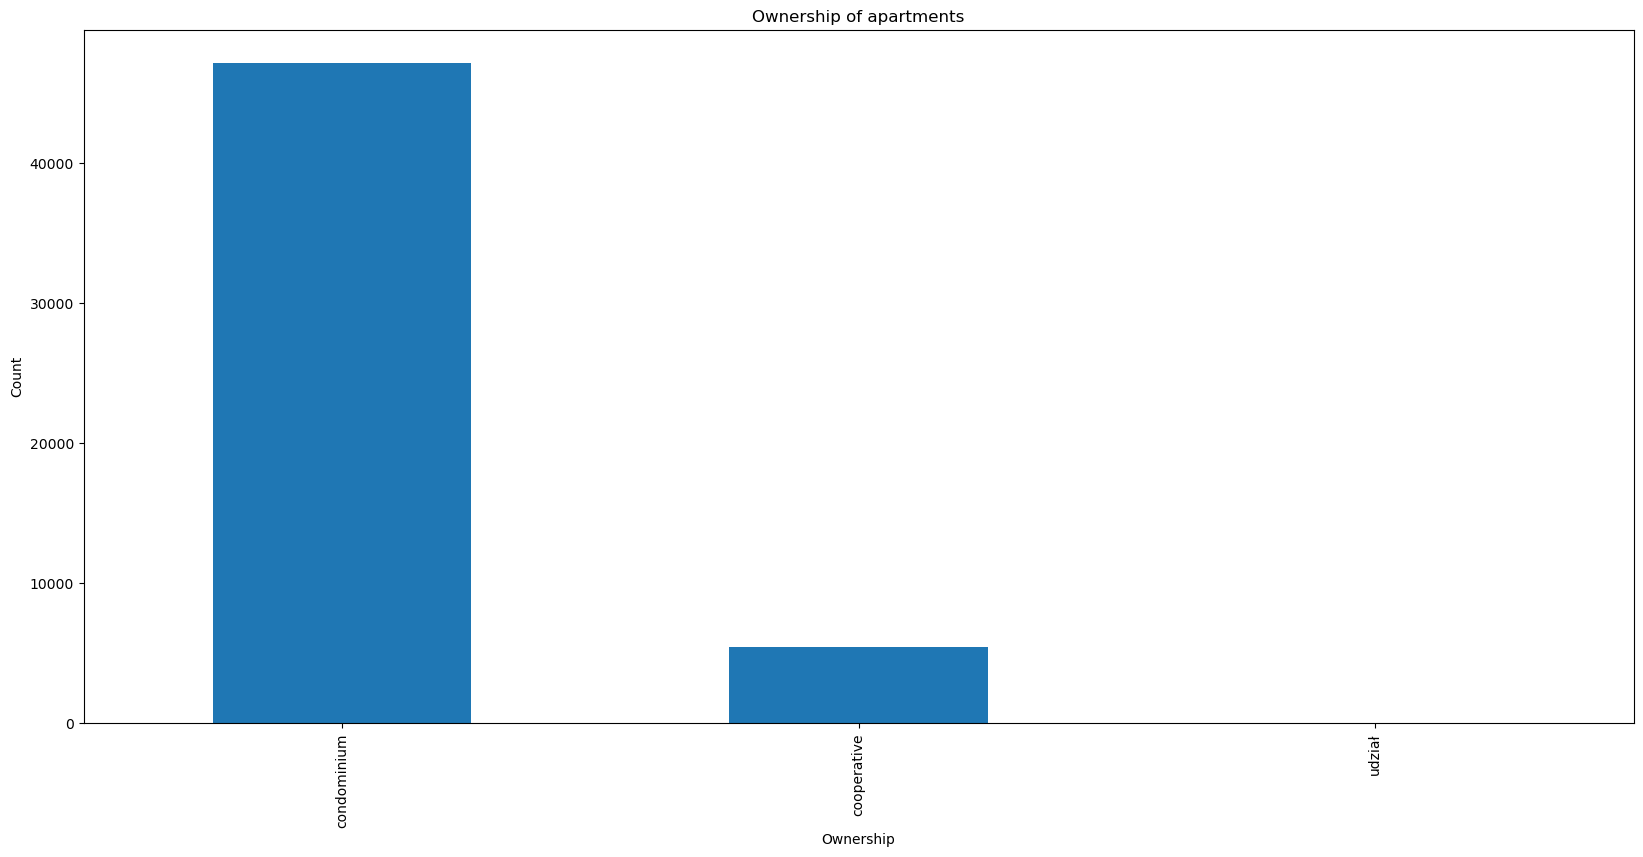

In [33]:
ownership_count = pd.value_counts(data_ALL['ownership']).plot.bar(figsize=(20,9))
ownership_count.set_title("Ownership of apartments")
ownership_count.set_xlabel("Ownership")
ownership_count.set_ylabel("Count")
ownership_count

Najczęstszym rodzajem własności jest wspólnota.

### Ilość mieszkań zbudowanych z danego materiału

<Axes: title={'center': 'Building Material of apartments'}, xlabel='BuildingMaterial', ylabel='Count'>

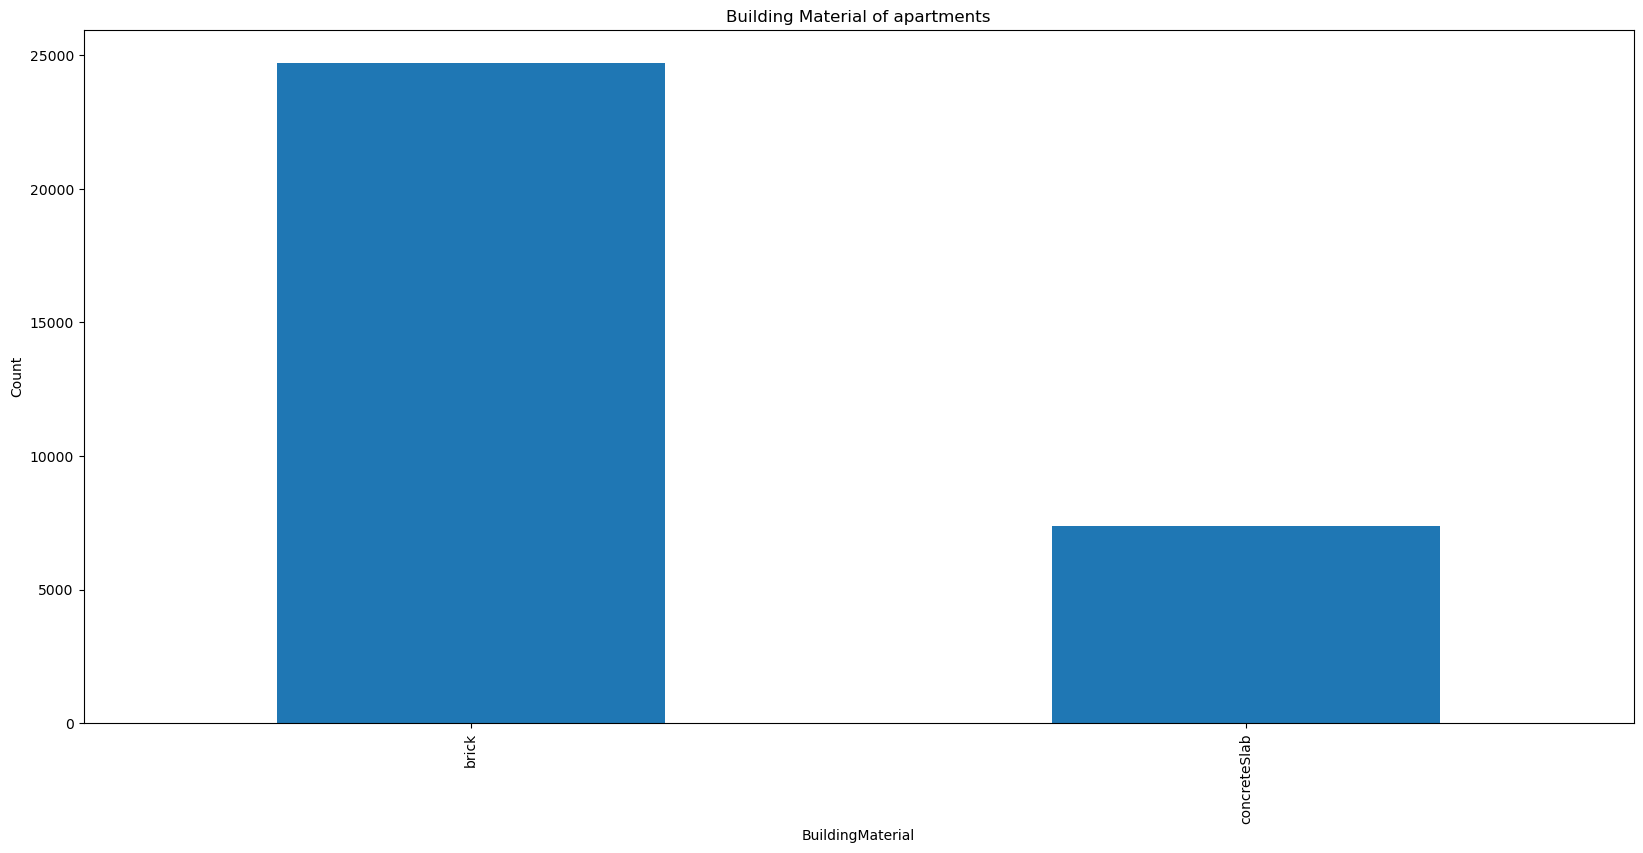

In [34]:
buildingMaterial_count = pd.value_counts(data_ALL['buildingMaterial']).plot.bar(figsize=(20,9))
buildingMaterial_count.set_title("Building Material of apartments")
buildingMaterial_count.set_xlabel("BuildingMaterial")
buildingMaterial_count.set_ylabel("Count")
buildingMaterial_count

### Liczba mieszkań w danym stanie

<Axes: title={'center': 'Condition of apartments'}, xlabel='Condition', ylabel='Count'>

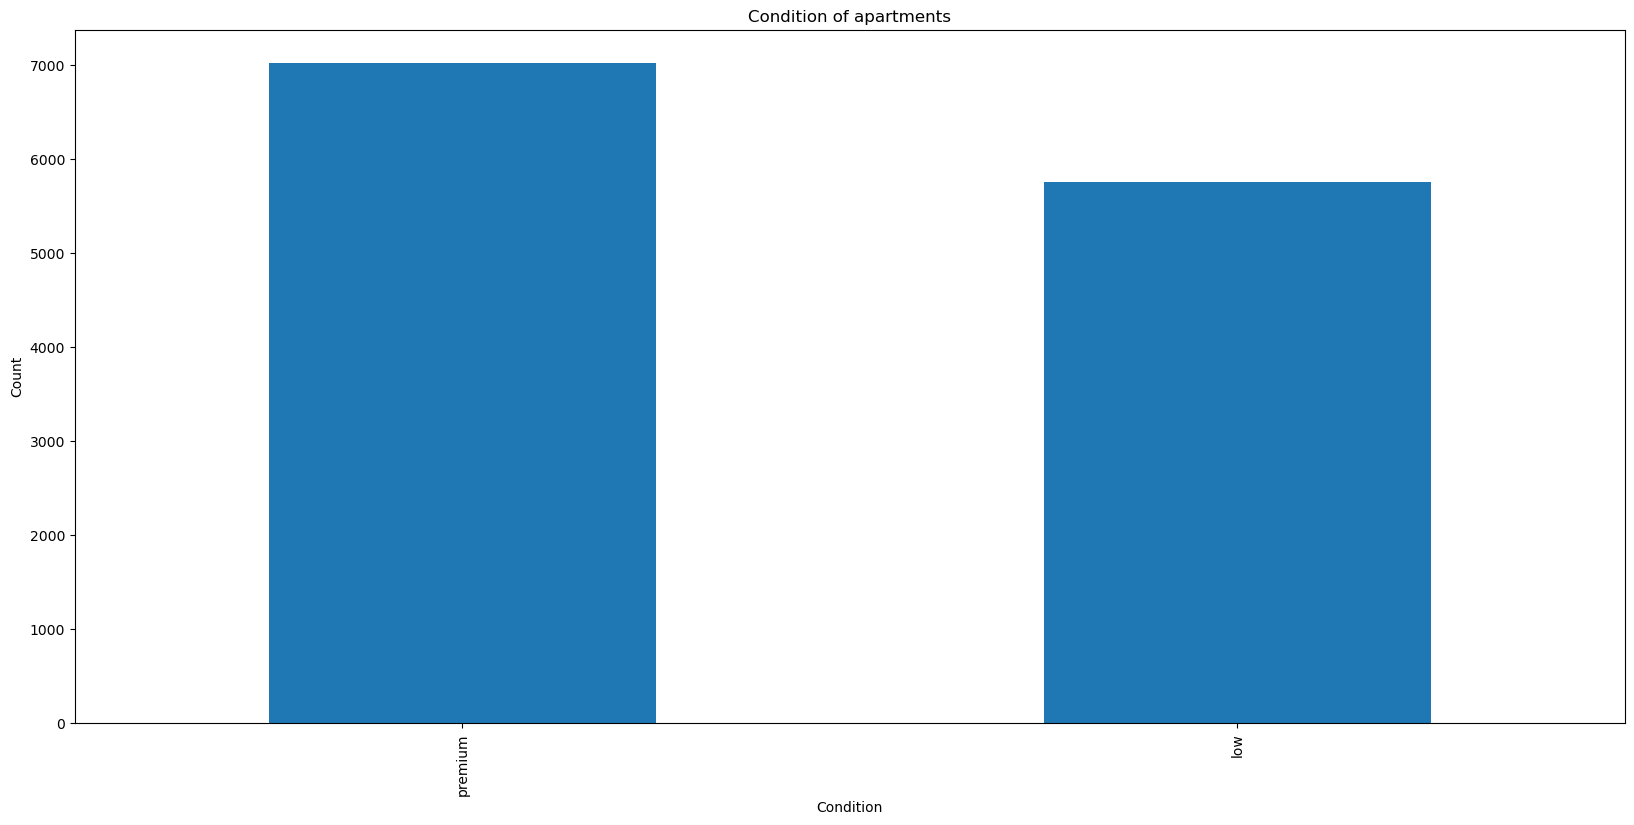

In [35]:
condition_count = pd.value_counts(data_ALL['condition']).plot.bar(figsize=(20,9))
condition_count.set_title("Condition of apartments")
condition_count.set_xlabel("Condition")
condition_count.set_ylabel("Count")
condition_count

Liczba mieszkań wynikająca z powyższego wykresu jest mniejsza od całkowitej liczbie w zbiorze danych, ponieważ 75% ogłoszeń nie ma podanych wartości stanu mieszkania.

### Liczba mieszkań posiadających miejsce parkingowe

<Axes: title={'center': 'Number of apartments with parking space'}, xlabel='Has Parking Space', ylabel='Count'>

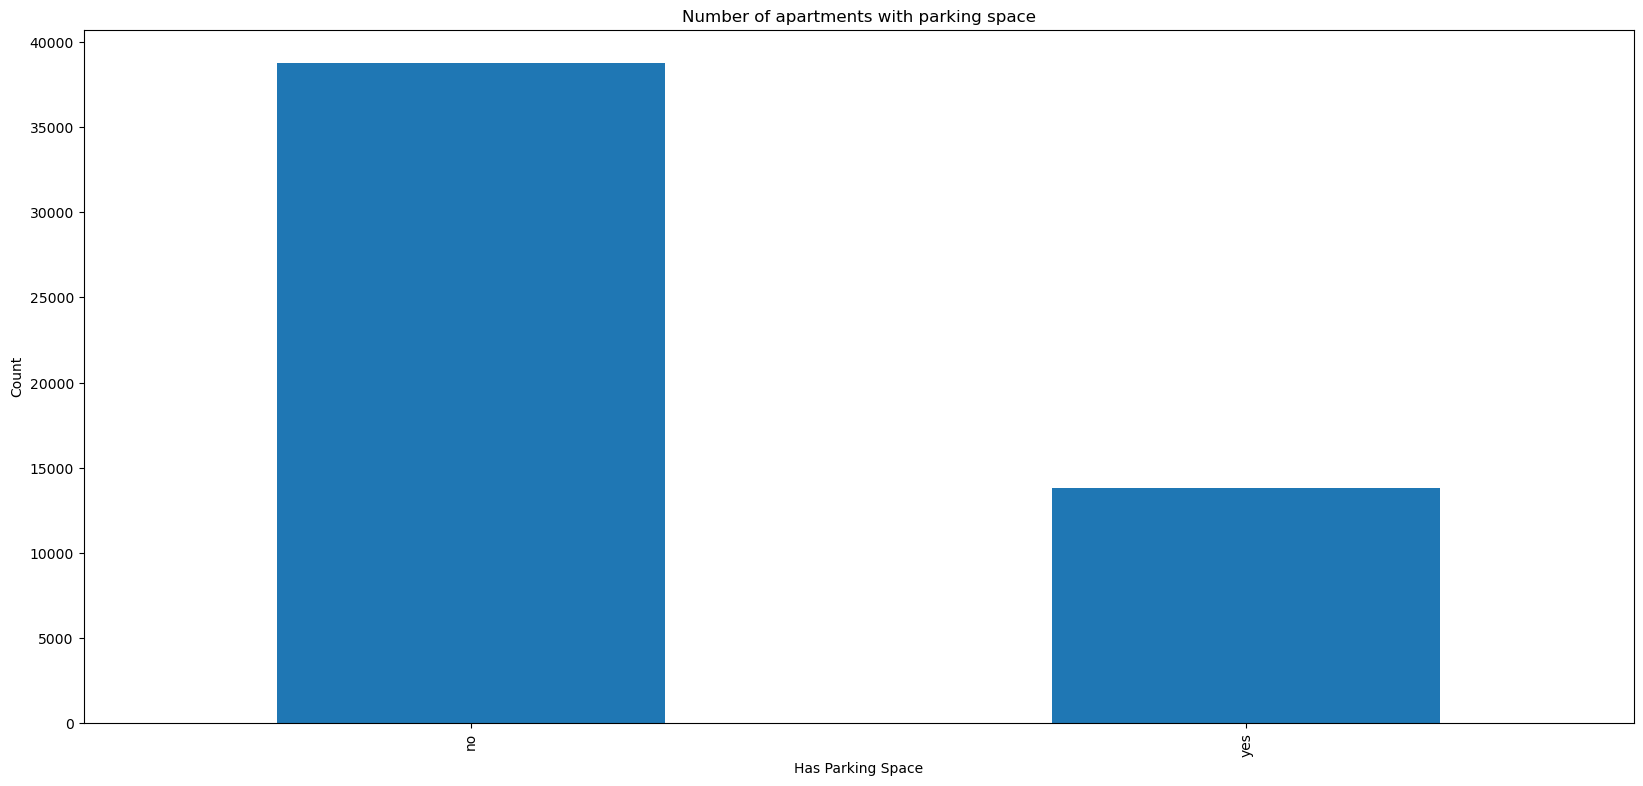

In [36]:
hasParkingSpace_count = pd.value_counts(data_ALL['hasParkingSpace']).plot.bar(figsize=(20,9))
hasParkingSpace_count.set_title("Number of apartments with parking space")
hasParkingSpace_count.set_xlabel("Has Parking Space")
hasParkingSpace_count.set_ylabel("Count")
hasParkingSpace_count

Większość mieszkań w ogłoszeniach nie posiada dedykowanego miejsca parkingowego.

### Liczba mieszkań posiadających balkon

<Axes: title={'center': 'Number of apartments with a balcony'}, xlabel='Has Balcony', ylabel='Count'>

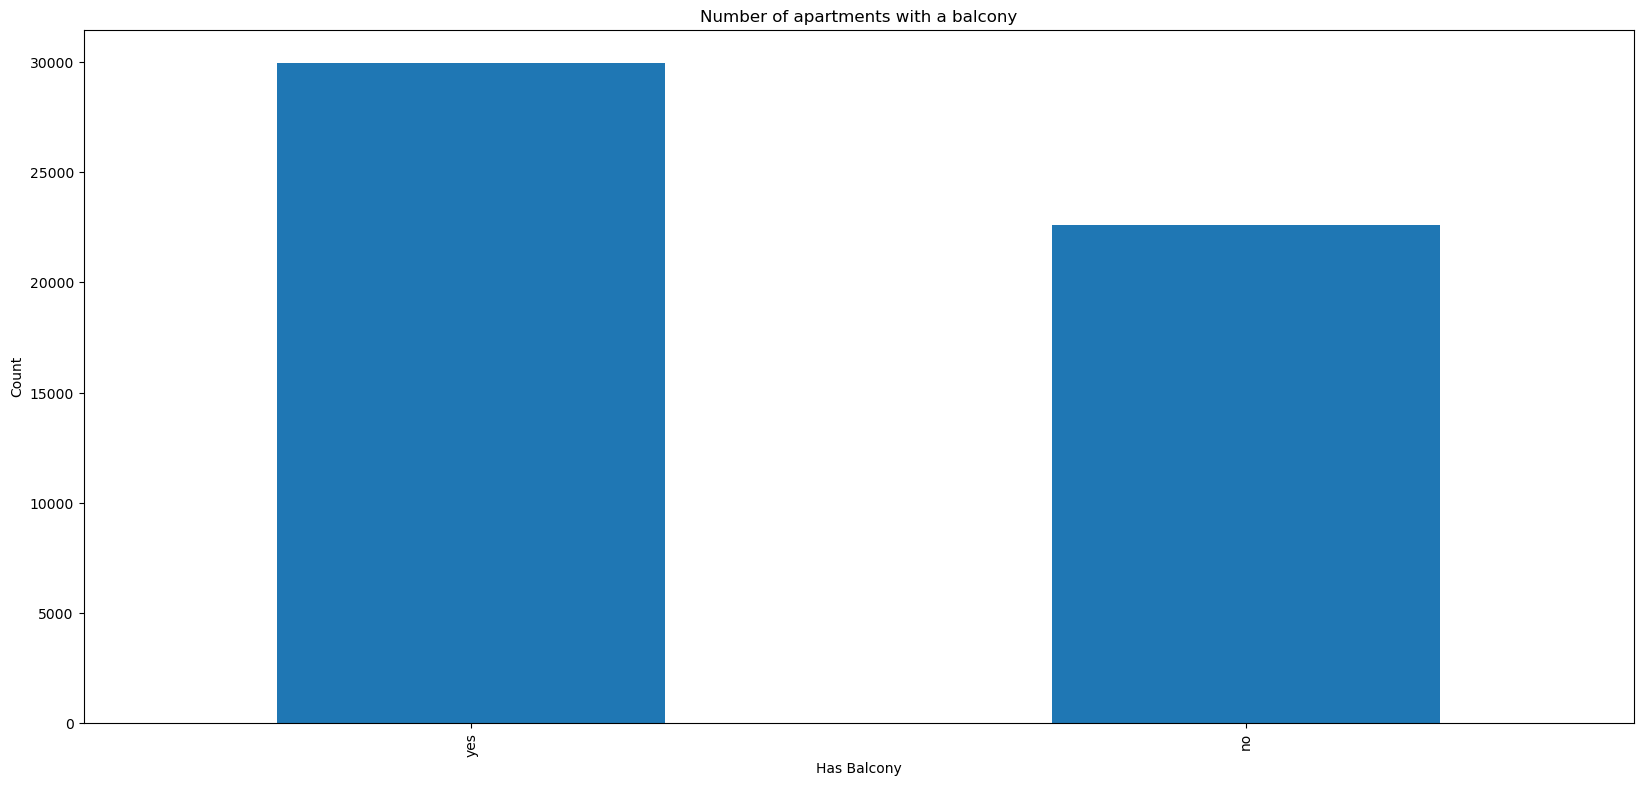

In [37]:
hasBalcony_count = pd.value_counts(data_ALL['hasBalcony']).plot.bar(figsize=(20,9))
hasBalcony_count.set_title("Number of apartments with a balcony")
hasBalcony_count.set_xlabel("Has Balcony")
hasBalcony_count.set_ylabel("Count")
hasBalcony_count

Większość mieszkań posiada balkon.

### Liczba mieszkań posiadających windę

<Axes: title={'center': 'Number of apartments with an elevator'}, xlabel='Has Elevator', ylabel='Count'>

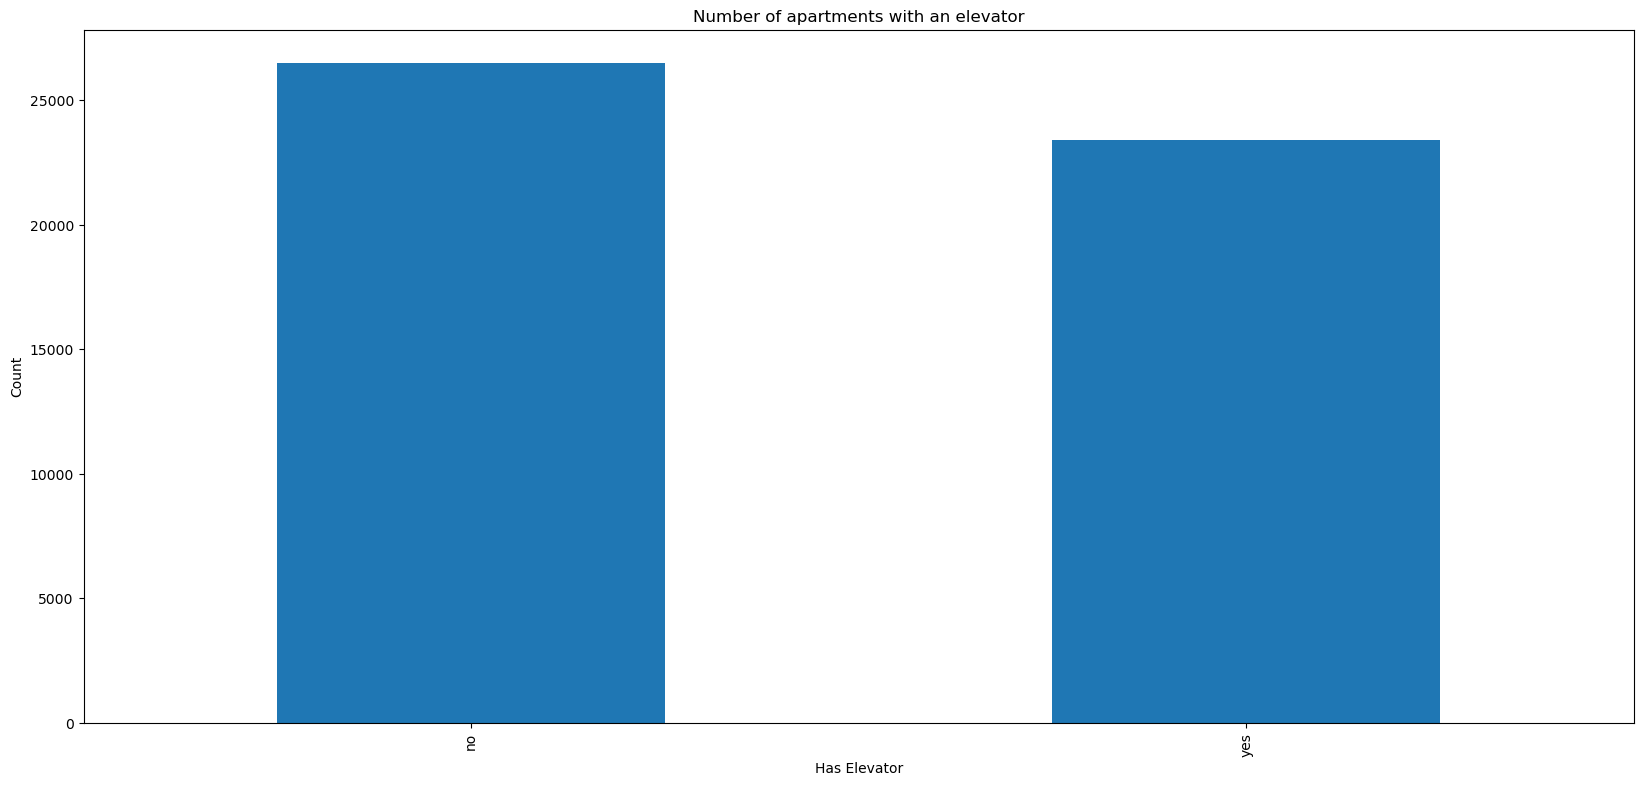

In [38]:
hasElevator_count = pd.value_counts(data_ALL['hasElevator']).plot.bar(figsize=(20,9))
hasElevator_count.set_title("Number of apartments with an elevator")
hasElevator_count.set_xlabel("Has Elevator")
hasElevator_count.set_ylabel("Count")
hasElevator_count

Większość mieszkań nie posiada windy.

### Liczba mieszkań posiadających ochronę

<Axes: title={'center': 'Number of apartments with security'}, xlabel='Has Security', ylabel='Count'>

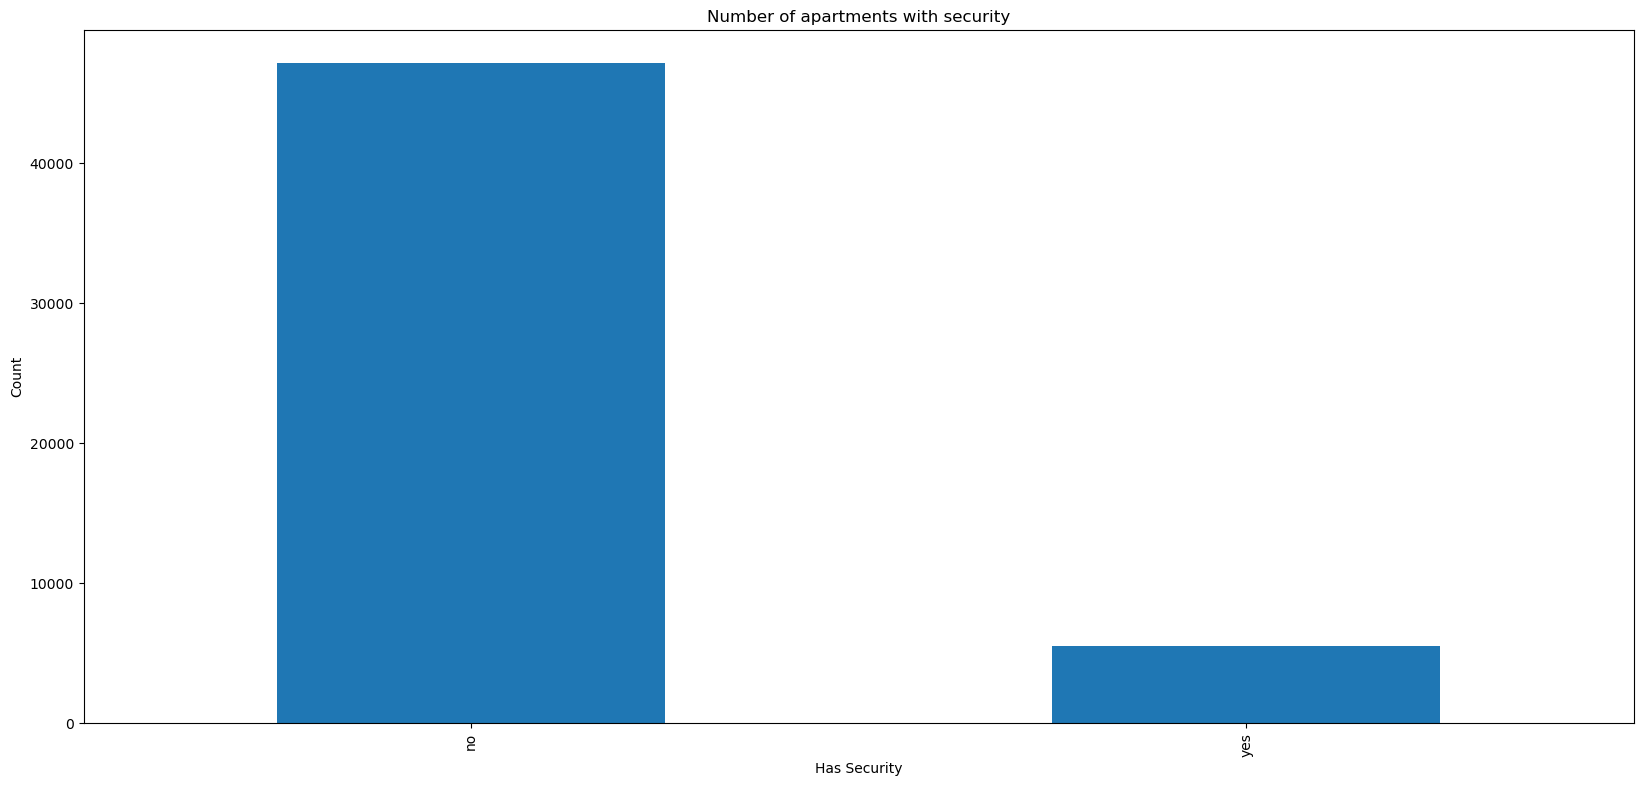

In [39]:
hasSecurity_count = pd.value_counts(data_ALL['hasSecurity']).plot.bar(figsize=(20,9))
hasSecurity_count.set_title("Number of apartments with security")
hasSecurity_count.set_xlabel("Has Security")
hasSecurity_count.set_ylabel("Count")
hasSecurity_count

Większość mieszkań nie posiada ochrony w budynku.

### Liczba mieszkań posiadających dodatkową komórkę lokatorską

<Axes: title={'center': 'Number of apartments with a storage room'}, xlabel='Has Storage Room', ylabel='Count'>

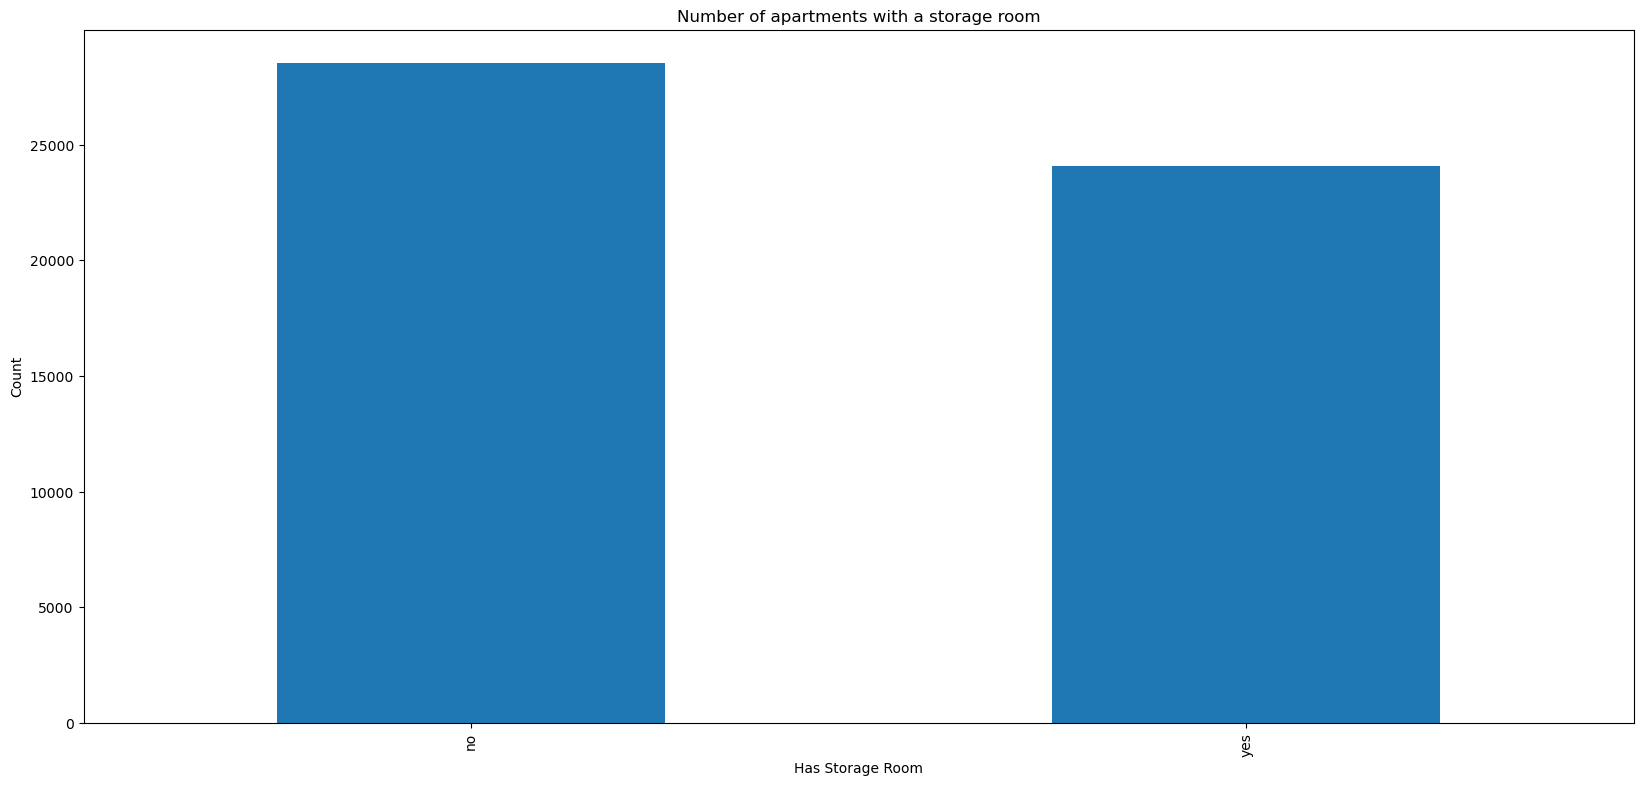

In [40]:
hasStorageRoom_count = pd.value_counts(data_ALL['hasStorageRoom']).plot.bar(figsize=(20,9))
hasStorageRoom_count.set_title("Number of apartments with a storage room")
hasStorageRoom_count.set_xlabel("Has Storage Room")
hasStorageRoom_count.set_ylabel("Count")
hasStorageRoom_count

Niewiele więcej mieszkań nie posiada komórki / składziku.

## Duplikaty

### Duplikaty w danych z miesiąca sierpień

In [41]:
data_AUG.loc[data_AUG.duplicated()]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price


In [42]:
aug_test = data_AUG
aug_test = aug_test.drop(columns=["id"])
aug_test.loc[aug_test.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
68,szczecin,tenement,101.00,3.00,3.00,4.00,1930.00,53.43,14.53,2.05,...,0.19,condominium,brick,premium,no,yes,no,no,yes,559000
211,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.13,condominium,brick,NaN,no,no,no,no,no,339000
213,szczecin,NaN,31.00,1.00,NaN,4.00,1986.00,53.40,14.53,3.85,...,0.26,cooperative,concreteSlab,NaN,no,yes,no,no,no,285000
291,szczecin,blockOfFlats,76.00,4.00,NaN,2.00,2023.00,53.43,14.55,0.79,...,0.09,condominium,NaN,NaN,yes,yes,no,no,no,480000
369,szczecin,NaN,53.00,2.00,3.00,4.00,1930.00,53.45,14.52,3.55,...,0.50,condominium,brick,premium,no,yes,no,no,no,499000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18262,bydgoszcz,blockOfFlats,42.00,2.00,NaN,11.00,NaN,53.12,18.05,3.29,...,0.15,cooperative,concreteSlab,low,no,yes,no,no,yes,274000
18349,bydgoszcz,blockOfFlats,35.14,2.00,4.00,4.00,NaN,53.11,18.03,2.70,...,0.15,cooperative,concreteSlab,NaN,no,yes,no,no,yes,255000
18429,bydgoszcz,blockOfFlats,31.00,1.00,NaN,11.00,NaN,53.12,18.05,3.29,...,0.15,condominium,concreteSlab,NaN,no,no,yes,no,yes,265000
18533,bydgoszcz,blockOfFlats,54.00,3.00,1.00,3.00,2022.00,53.12,18.01,0.50,...,0.39,condominium,NaN,premium,no,yes,yes,no,no,485900


In [43]:
aug_test_2 = aug_test.drop(columns=["price"])
aug_test_2.loc[aug_test_2.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
68,szczecin,tenement,101.00,3.00,3.00,4.00,1930.00,53.43,14.53,2.05,...,0.64,0.19,condominium,brick,premium,no,yes,no,no,yes
211,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.67,0.13,condominium,brick,NaN,no,no,no,no,no
213,szczecin,NaN,31.00,1.00,NaN,4.00,1986.00,53.40,14.53,3.85,...,2.70,0.26,cooperative,concreteSlab,NaN,no,yes,no,no,no
261,szczecin,NaN,68.20,3.00,1.00,1.00,NaN,53.48,14.53,6.39,...,3.82,1.24,condominium,NaN,NaN,no,no,no,no,no
277,szczecin,NaN,60.64,3.00,NaN,4.00,1980.00,53.43,14.54,1.58,...,0.46,0.04,condominium,concreteSlab,premium,no,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18349,bydgoszcz,blockOfFlats,35.14,2.00,4.00,4.00,NaN,53.11,18.03,2.70,...,0.90,0.15,cooperative,concreteSlab,NaN,no,yes,no,no,yes
18429,bydgoszcz,blockOfFlats,31.00,1.00,NaN,11.00,NaN,53.12,18.05,3.29,...,0.86,0.15,condominium,concreteSlab,NaN,no,no,yes,no,yes
18533,bydgoszcz,blockOfFlats,54.00,3.00,1.00,3.00,2022.00,53.12,18.01,0.50,...,0.33,0.39,condominium,NaN,premium,no,yes,yes,no,no
18545,bydgoszcz,blockOfFlats,44.60,3.00,4.00,11.00,NaN,53.12,18.05,3.29,...,0.86,0.15,condominium,concreteSlab,NaN,no,no,yes,no,yes


### Duplikaty w danych z miesiąca wrzesień

In [44]:
data_SEP.loc[data_SEP.duplicated()]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price


In [45]:
sep_test = data_SEP
sep_test = sep_test.drop(columns=["id"])
sep_test.loc[sep_test.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
145,szczecin,blockOfFlats,82.00,4.00,2.00,2.00,1960.00,53.44,14.50,4.47,...,0.43,condominium,brick,NaN,yes,no,no,no,yes,659000
225,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.13,condominium,brick,NaN,no,no,no,no,no,339000
249,szczecin,NaN,65.60,3.00,6.00,8.00,1980.00,53.42,14.45,7.54,...,1.44,cooperative,concreteSlab,NaN,no,yes,yes,no,no,460000
336,szczecin,NaN,53.00,2.00,3.00,4.00,1930.00,53.45,14.52,3.55,...,0.50,condominium,brick,premium,no,yes,no,no,no,499000
440,szczecin,tenement,70.00,3.00,1.00,3.00,1936.00,53.43,14.54,1.45,...,0.15,condominium,brick,low,no,no,no,no,yes,369000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15916,warszawa,NaN,108.50,4.00,5.00,6.00,2006.00,52.19,20.86,10.67,...,0.68,condominium,concreteSlab,NaN,no,yes,yes,no,no,1200000
16557,bydgoszcz,blockOfFlats,35.14,2.00,4.00,4.00,NaN,53.11,18.03,2.70,...,0.15,cooperative,concreteSlab,NaN,no,yes,no,no,yes,255000
16621,bydgoszcz,blockOfFlats,31.00,1.00,NaN,11.00,NaN,53.12,18.05,3.29,...,0.15,condominium,concreteSlab,NaN,no,no,yes,no,yes,265000
16695,bydgoszcz,blockOfFlats,54.00,3.00,1.00,3.00,2022.00,53.12,18.01,0.50,...,0.39,condominium,NaN,premium,no,yes,yes,no,no,485900


In [46]:
sep_test_2 = sep_test.drop(columns=["price"])
sep_test_2.loc[sep_test_2.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
145,szczecin,blockOfFlats,82.00,4.00,2.00,2.00,1960.00,53.44,14.50,4.47,...,2.12,0.43,condominium,brick,NaN,yes,no,no,no,yes
225,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.67,0.13,condominium,brick,NaN,no,no,no,no,no
249,szczecin,NaN,65.60,3.00,6.00,8.00,1980.00,53.42,14.45,7.54,...,NaN,1.44,cooperative,concreteSlab,NaN,no,yes,yes,no,no
336,szczecin,NaN,53.00,2.00,3.00,4.00,1930.00,53.45,14.52,3.55,...,0.65,0.50,condominium,brick,premium,no,yes,no,no,no
440,szczecin,tenement,70.00,3.00,1.00,3.00,1936.00,53.43,14.54,1.45,...,0.26,0.15,condominium,brick,low,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,bydgoszcz,blockOfFlats,31.00,1.00,NaN,11.00,NaN,53.12,18.05,3.29,...,0.86,0.15,condominium,concreteSlab,NaN,no,no,yes,no,yes
16656,bydgoszcz,NaN,65.00,3.00,4.00,6.00,2022.00,53.14,18.03,2.59,...,1.52,0.17,condominium,brick,premium,no,yes,yes,no,no
16695,bydgoszcz,blockOfFlats,54.00,3.00,1.00,3.00,2022.00,53.12,18.01,0.50,...,0.33,0.39,condominium,NaN,premium,no,yes,yes,no,no
16787,bydgoszcz,blockOfFlats,54.00,3.00,NaN,11.00,NaN,53.11,17.99,1.32,...,1.18,0.32,condominium,concreteSlab,NaN,no,yes,no,no,yes


### Duplikaty w danych z miesiąca październik

In [47]:
data_OCT.loc[data_OCT.duplicated()]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price


In [48]:
oct_test = data_OCT
oct_test = oct_test.drop(columns=["id"])
oct_test.loc[oct_test.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
68,szczecin,tenement,101.00,3.00,3.00,4.00,1930.00,53.43,14.53,2.05,...,0.19,condominium,brick,premium,no,yes,no,no,yes,559000
274,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.13,condominium,brick,NaN,no,no,no,no,no,339000
286,szczecin,NaN,65.60,3.00,6.00,8.00,1980.00,53.42,14.45,7.54,...,1.44,cooperative,concreteSlab,NaN,no,yes,yes,no,no,460000
300,szczecin,NaN,75.00,4.00,3.00,4.00,1930.00,53.46,14.55,3.64,...,0.12,condominium,brick,NaN,no,yes,no,no,no,525000
343,szczecin,NaN,53.00,2.00,3.00,4.00,1930.00,53.45,14.52,3.55,...,0.50,condominium,brick,premium,no,yes,no,no,no,499000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,warszawa,NaN,56.00,2.00,1.00,1.00,1935.00,52.26,20.99,3.51,...,0.21,condominium,NaN,NaN,no,no,no,no,no,1500000
15495,warszawa,blockOfFlats,80.00,4.00,1.00,2.00,1995.00,52.24,20.92,5.58,...,0.42,condominium,brick,NaN,no,no,no,no,no,1090000
15539,warszawa,blockOfFlats,67.83,3.00,2.00,2.00,2014.00,52.34,21.05,12.90,...,0.53,condominium,brick,premium,yes,no,no,no,no,689000
15653,warszawa,NaN,108.50,4.00,5.00,6.00,2006.00,52.19,20.86,10.67,...,0.68,condominium,concreteSlab,NaN,no,yes,yes,no,no,1200000


In [49]:
oct_test_2 = oct_test.drop(columns=["price"])
oct_test_2.loc[oct_test_2.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
68,szczecin,tenement,101.00,3.00,3.00,4.00,1930.00,53.43,14.53,2.05,...,0.64,0.19,condominium,brick,premium,no,yes,no,no,yes
274,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.67,0.13,condominium,brick,NaN,no,no,no,no,no
286,szczecin,NaN,65.60,3.00,6.00,8.00,1980.00,53.42,14.45,7.54,...,NaN,1.44,cooperative,concreteSlab,NaN,no,yes,yes,no,no
300,szczecin,NaN,75.00,4.00,3.00,4.00,1930.00,53.46,14.55,3.64,...,1.80,0.12,condominium,brick,NaN,no,yes,no,no,no
343,szczecin,NaN,53.00,2.00,3.00,4.00,1930.00,53.45,14.52,3.55,...,0.65,0.50,condominium,brick,premium,no,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16176,bydgoszcz,blockOfFlats,41.80,2.00,2.00,4.00,NaN,53.11,18.03,2.70,...,0.90,0.15,condominium,concreteSlab,NaN,no,yes,no,no,yes
16235,bydgoszcz,blockOfFlats,53.00,3.00,4.00,4.00,1978.00,53.11,18.03,2.70,...,0.90,0.15,condominium,concreteSlab,NaN,no,yes,no,no,yes
16405,bydgoszcz,NaN,65.00,3.00,4.00,6.00,2022.00,53.14,18.03,2.59,...,1.52,0.17,condominium,brick,premium,no,yes,yes,no,no
16434,bydgoszcz,blockOfFlats,54.00,3.00,1.00,3.00,2022.00,53.12,18.01,0.50,...,0.33,0.39,condominium,NaN,premium,no,yes,yes,no,no


### Duplikaty w danych połączonych

In [50]:
duplicates_ALL = data_ALL.loc[data_ALL.duplicated()]
duplicates_ALL.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
18905,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.00,2.00,3.00,NaN,53.43,14.54,...,0.32,condominium,brick,NaN,no,yes,no,no,yes,799000
18906,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.00,5.00,5.00,NaN,53.43,14.55,...,0.07,cooperative,NaN,NaN,no,no,yes,no,no,420000
18909,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.00,2.00,3.00,NaN,53.45,14.55,...,0.28,condominium,brick,NaN,no,no,no,no,no,565000
18912,eb15c0a8a7f16a523f5cf5f61de06638,szczecin,blockOfFlats,49.50,2.00,1.00,4.00,1980.00,53.37,14.66,...,0.24,cooperative,NaN,low,no,yes,no,no,yes,462000
18922,209a6d2dea99216bdf83a968343cd3b3,szczecin,tenement,61.48,2.00,NaN,3.00,1900.00,53.49,14.61,...,1.52,condominium,brick,premium,no,no,no,no,yes,390000


In [51]:
all_test = duplicates_ALL
all_test = all_test.drop(columns=["id"])
all_test.loc[all_test.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
19130,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.13,condominium,brick,NaN,no,no,no,no,no,339000
19241,szczecin,NaN,53.00,2.00,3.00,4.00,1930.00,53.45,14.52,3.55,...,0.50,condominium,brick,premium,no,yes,no,no,no,499000
19345,szczecin,tenement,70.00,3.00,1.00,3.00,1936.00,53.43,14.54,1.45,...,0.15,condominium,brick,low,no,no,no,no,yes,369000
19813,gdynia,blockOfFlats,64.00,3.00,NaN,3.00,NaN,54.55,18.53,2.95,...,2.00,condominium,NaN,premium,yes,yes,yes,no,yes,949000
19845,gdynia,blockOfFlats,53.30,2.00,2.00,2.00,2012.00,54.46,18.49,7.24,...,0.39,condominium,brick,NaN,no,yes,yes,no,no,688000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52581,bydgoszcz,tenement,147.00,6.00,1.00,3.00,NaN,53.13,18.01,0.65,...,0.20,condominium,brick,low,no,no,no,no,yes,520000
52583,bydgoszcz,tenement,110.07,4.00,2.00,2.00,1852.00,53.13,18.01,0.65,...,0.20,condominium,brick,low,no,no,no,no,no,510000
52584,bydgoszcz,blockOfFlats,93.30,4.00,NaN,2.00,1937.00,53.12,17.99,0.56,...,0.30,condominium,brick,premium,no,no,no,no,yes,469900
52588,bydgoszcz,tenement,100.00,4.00,3.00,4.00,1910.00,53.13,18.01,0.65,...,0.20,condominium,brick,premium,yes,yes,no,no,yes,590000


In [52]:
all_test_2 = all_test.drop(columns=["price"])
all_test_2.loc[all_test_2.duplicated()]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
19130,szczecin,NaN,48.16,2.00,3.00,4.00,NaN,53.42,14.55,0.82,...,0.67,0.13,condominium,brick,NaN,no,no,no,no,no
19241,szczecin,NaN,53.00,2.00,3.00,4.00,1930.00,53.45,14.52,3.55,...,0.65,0.50,condominium,brick,premium,no,yes,no,no,no
19345,szczecin,tenement,70.00,3.00,1.00,3.00,1936.00,53.43,14.54,1.45,...,0.26,0.15,condominium,brick,low,no,no,no,no,yes
19355,szczecin,tenement,70.00,3.00,1.00,3.00,1936.00,53.43,14.54,1.45,...,0.26,0.15,condominium,brick,low,no,no,no,no,yes
19372,szczecin,blockOfFlats,76.64,3.00,2.00,4.00,1990.00,53.43,14.53,1.98,...,0.72,0.05,condominium,brick,premium,no,yes,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52581,bydgoszcz,tenement,147.00,6.00,1.00,3.00,NaN,53.13,18.01,0.65,...,0.62,0.20,condominium,brick,low,no,no,no,no,yes
52583,bydgoszcz,tenement,110.07,4.00,2.00,2.00,1852.00,53.13,18.01,0.65,...,0.62,0.20,condominium,brick,low,no,no,no,no,no
52584,bydgoszcz,blockOfFlats,93.30,4.00,NaN,2.00,1937.00,53.12,17.99,0.56,...,0.27,0.30,condominium,brick,premium,no,no,no,no,yes
52588,bydgoszcz,tenement,100.00,4.00,3.00,4.00,1910.00,53.13,18.01,0.65,...,0.62,0.20,condominium,brick,premium,yes,yes,no,no,yes


In [53]:
len(duplicates_ALL)

17360

W rozdzielonych zbiorach, po usunięciu identyfikatorów rekordów możemy znaleźć duplikaty, co może świadczyć o tym, że te same mieszkania były wystawiane na sprzedaż w kilku ogłoszeniach, lub ogłoszenia wygasały i po przedłużeniu otrzymywały nowe numery id. Po połączeniu zbiorów liczba duplikatów jest znacząco większa, niż suma liczb duplikatów z poszczególnych miesięcy, co może oznaczać, że duża liczba ogłoszeń znajdowała się w co najmniej dwóch zbiorach danych (była wystawiona na sprzedaż przez co najmniej miesiąc). 

## Liczebności przykładów z poszczególnych klas

N/A

## Współczynnik IR (imbalanced ratio)

N/A

## Mapa korelacji atrybutów

In [54]:
data_ALL.corr()

C:\Users\leszc\AppData\Local\Temp\ipykernel_6500\2801310899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_ALL.corr()


,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
squareMeters,1.00,0.83,-0.09,-0.14,0.01,0.03,-0.02,0.08,0.01,0.07,0.02,0.05,0.07,0.04,0.05,0.06,0.63
rooms,0.83,1.00,-0.05,-0.09,0.03,0.03,0.00,0.08,-0.02,0.07,0.05,0.06,0.06,0.05,0.07,0.07,0.49
floor,-0.09,-0.05,1.00,0.68,0.07,-0.01,0.08,-0.03,0.03,-0.11,-0.13,-0.09,-0.10,-0.09,-0.06,-0.11,0.01
floorCount,-0.14,-0.09,0.68,1.00,0.14,-0.01,0.11,-0.03,0.04,-0.13,-0.18,-0.11,-0.13,-0.12,-0.07,-0.13,0.03
buildYear,0.01,0.03,0.07,0.14,1.00,-0.02,0.11,0.38,-0.39,0.26,0.26,0.24,0.12,0.17,0.37,0.20,0.15
latitude,0.03,0.03,-0.01,-0.01,-0.02,1.00,-0.22,0.09,-0.06,0.18,0.14,0.13,0.20,0.18,0.12,0.17,0.02
longitude,-0.02,0.00,0.08,0.11,0.11,-0.22,1.00,0.19,0.03,-0.10,-0.06,-0.05,-0.14,-0.11,-0.00,-0.07,0.21
centreDistance,0.08,0.08,-0.03,-0.03,0.38,0.09,0.19,1.00,-0.46,0.29,0.45,0.27,0.14,0.23,0.55,0.26,0.12
poiCount,0.01,-0.02,0.03,0.04,-0.39,-0.06,0.03,-0.46,1.00,-0.31,-0.38,-0.32,-0.21,-0.34,-0.44,-0.30,0.17
schoolDistance,0.07,0.07,-0.11,-0.13,0.26,0.18,-0.10,0.29,-0.31,1.00,0.56,0.77,0.81,0.79,0.43,0.82,0.01


C:\Users\leszc\AppData\Local\Temp\ipykernel_6500\392558912.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_ALL.corr())


<Axes: >

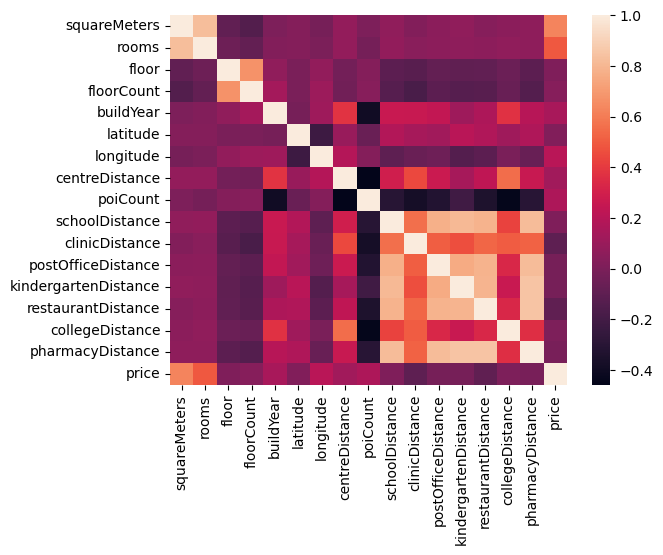

In [55]:
#sns.heatmap(data_ALL.corr(), vmin = -1, vmax = 1)
sns.heatmap(data_ALL.corr())

<p>Analizując wykres korelacji poszczególnych zmiennych można zauważyć bardzo silną korelację pomiędzy ceną mieszkania, a powierzchnią mieszkania i liczbą pokoi. Dość silna jest również korelacja pomiędzy odległościami od różnych punktów zainteresowania (apteki, restauracje, przedszkola, szkoły, poczta). Zauważalna jest również ujemna korelacja pomiędzy liczbą punktów zainteresowania, a odległością od poszczególnych typów punktów i odległością od centrum, oraz ujemna korelacja pomiędzy liczbą punktów zainteresowań, a rokiem budowy.</p>

## Weryfikacja zasadności pozostawienia/usunięcia poszczególnych atrybutów na podstawie wiedzy dziedzinowej

W kontekście analizy danych, została podjęta decyzja o usunięciu atrybutów `schoolDistance`, `clinicDistance`, `postOfficeDistance`, `kindergartenDistance`, `restaurantDistance`, `collegeDistance` i `pharmacyDistance`. Ta decyzja opiera się na następujących uzasadnieniach:

1. **Istnienie Atrybutu `poiCount`:** W danych znajduje się atrybut `poiCount`, który określa liczbę istotnych punktów usługowych (POI) w odległości 500 metrów od nieruchomości. Decyzja o usunięciu odległości do poszczególnych typów POI wynika z faktu, że atrybut `poiCount` zawiera już istotną informację o dostępności tych usług w najbliższym otoczeniu nieruchomości.

2. **Redundancja Informacji:** Odległości do różnych rodzajów usług, takich jak szkoły, kliniki, poczty, przedszkola, restauracje, uczelnie i apteki mogą być ściśle powiązane i dostarczać zbliżoną informację. Usunięcie tych atrybutów pomaga w zredukowaniu potencjalnej redundancji w danych.

3. **Wiedza dziedzinowa:** Z wiedzy dziedzinowej wynika, że atrybuty te, choć istotne, są bardziej ogólnymi wskaźnikami dostępności usług w okolicy, a nasze główne zainteresowanie koncentruje się na ogólnym `poiCount` jako bardziej miarodajnym wskaźniku.

## Wnioski

**Dane pozyskano ze zbioru:** [Apartment Prices in Poland](https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland?fbclid=IwAR3IG3sMFVlnqFwshfNoBvJr9Wg2iCohvIh1kvItmX5_h-Q8ei3oqUtC2Sk&select=apartments_pl_2023_08.csv) 
w postaci plików csv zawierających ogłoszenia sprzedaży mieszkań z trzech miesięcy roku 2023. Pliki zawierają dane liczbowe oraz tekstowe.  Połączono te pliki w jedną tabelę, z czego otrzymano zbiór **52,5 tys. elementów**. W tak utworzonym zbiorze znaleziono ponad **17 tys. duplikatów**, co może znaczyć o tym, że ogłoszenia mogły być aktywne przez kilka miesięcy lub były ponownie wystawiane.
  
**Jako atrybut decyzyjny zostanie przyjęta cena mieszkania.** 
Z [analizy korelacji atrybutów](#Mapa-korelacji-atrybutów) można zauważyć, że na cenę mieszkania największy wpływ mają jego powierzchnia oraz liczba pokoi. Wartość atrybutu decyzyjnego będzie trzeba najprawdobodobniej podzielić na kilka przedziałów cenowych, ponieważ z [charakterystyki atrybutu decyzyjnego](#Atrybut-decyzyjny---charakterystyka) można zauważyć, że zawiera on ponad 3 tys. unikatowych wartości.
  
Ze zbioru danych zostaną usunięte atrybuty: `schoolDistance`, `clinicDistance`, `postOfficeDistance`, `kindergartenDistance`, `restaurantDistance`, `collegeDistance` i `pharmacyDistance`, co zostało uzasadnione w sekcji [powyżej](#Weryfikacja-zasadności-pozostawienia/usunięcia-poszczególnych-atrybutów-na-podstawie-wiedzy-dziedzinowej).